<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center">PROJET DE TRAITEMENT DE DONNEES ET ECONOMETRIQUE </h1> 
<hr style="border-width:2px;border-color:#75DFC1">

## Objectif du Projet

L'objectif principal est d'analyser ces données pour identifier des tendances, des corrélations, et des anomalies, puis de modéliser ces informations pour prédire des comportements ou optimiser des stratégies d'assurance.

## Méthodologie

1. **Traitement des Données :** Nettoyage, gestion des anomalies, et préparation des données pour l'analyse.
2. **Analyse Exploratoire :** Analyse descriptive et visuelle pour comprendre les données à notre disposition.
3. **Modélisation :** Application de techniques de machine learning et d'économétrie pour extraire des modèles et des prédictions à partir des données.
4. **Interprétation :** Évaluation des modèles et analyse des résultats pour dégager des insights et des recommandations

## Description des variables :

| Nom | Description |
|:---|:---|
| **Id_pol** | Identifiant unique de la police d'assurance. |
| **Annual.pct.driven** | Pourcentage de l'année pendant lequel le véhicule est conduit. |
| **Total.miles.driven** | Nombre total de miles parcourus pendant l'année. |
| **Pct.drive.mon à Pct.drive.sun** | Pourcentage du total des miles parcourus chaque jour de la semaine (lundi à dimanche). |
| **Pct.drive.2hrs, Pct.drive.3hrs, Pct.drive.4hrs** | Pourcentage du total des miles parcourus en sessions de conduite de 2 heures, 3 heures et 4 heures, respectivement. |
| **Pct.drive.wkday et Pct.drive.wkend** | Pourcentage du total des miles parcourus en semaine (jours ouvrables) et le weekend. |
| **Pct.drive.rush am et Pct.drive.rush pm** | Pourcentage du total des miles parcourus pendant les heures de pointe du matin et du soir. |
| **Avgdays.week** | Nombre moyen de jours par semaine pendant lesquels le véhicule est conduit. |
| **Accel.06miles à Accel.14miles** | Nombre d'accélérations fortes par 100 miles, classées par intensité (par exemple, 0.6 miles par heure^2 à 1.4 miles par heure^2). |
| **Brake.06miles à Brake.14miles** | Nombre de freinages forts par 100 miles, également classés par intensité. |
| **Left.turn.intensity08 à Left.turn.intensity12 et Right.turn.intensity08 à Right.turn.intensity12** | Mesures de l'intensité des virages à gauche et à droite, probablement notées sur une échelle ou selon des seuils spécifiques d'intensité de virage.|
| **Duration** | Durée de la police d'assurance. |
| **Insured_age** | Âge de l'assuré. |
| **Insured_sex** | Sexe de l'assuré. |
| **Car_age** | Âge du véhicule assuré. |
| **Marital** | Statut marital de l'assuré. |
| **Car_use** | Utilisation du véhicule (personnel, professionnel, etc.). |
| **Credit_score** | Score de crédit de l'assuré. |
| **Region** | Région géographique. |
| **Annual_miles_drive** | Nombre annuel de miles parcourus. |
| **Years_noclaims** | Années sans sinistres. |
| **Territory** | Territoire géographique. |
| **AMT_Claim** | Montant des sinistres. |
| **NB_Claim** | Nombre de sinistres. |


### Lecture des données

* Commencons par l'importation des packages nécessaires

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# Configurer Pandas pour afficher toutes les lignes et les colonnes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

##Gestion des avertissements
import warnings
# Ignorer tous les avertissements
warnings.filterwarnings('ignore')


#pip install ipywidgets
#pip install seaborn matplotlib

* Importons le jeu de données et procedons à un rapide examen de celui-ci

In [2]:
data= pd.read_csv("C:/Users/Skodon/Downloads/DU big data/DB_TELEMATICS.csv", sep=";")

In [3]:
data.head()

Id_pol  Annual.pct.driven  Total.miles.driven  Pct.drive.mon  \
0  cnt_122389           0.997260         5372.837273       0.192885   
1  cnt_125019           0.912329         5780.818246       0.103235   
2  cnt_181154           0.526027         9149.738331       0.116469   
3  cnt_140021           1.000000        10582.266630       0.144176   
4  cnt_170356           0.758904         9412.021708       0.109676   

   Pct.drive.tue  Pct.drive.wed  Pct.drive.thr  Pct.drive.fri  Pct.drive.sat  \
0       0.169069       0.197889       0.184917       0.161892       0.056223   
1       0.118669       0.107923       0.137311       0.174103       0.203041   
2       0.145888       0.135275       0.173258       0.160496       0.084183   
3       0.151476       0.168559       0.171549       0.177908       0.114749   
4       0.152353       0.151707       0.160847       0.140825       0.151463   

   Pct.drive.sun  Pct.drive.2hrs  Pct.drive.3hrs  Pct.drive.4hrs  \
0       0.037124        0.000000        0.000000        0.000000   
1       0.155717        0.004088        0.001088        0.000000   
2       0.184431        0.000551        0.000000        0.000000   
3       0.071583        0.001682        0.000000        0.000000   
4       0.133128        0.002030        0.000030        0.000015   

   Pct.drive.wkday  Pct.drive.wkend  Pct.drive.rush am  Pct.drive.rush pm  \
0         0.908797         0.091203           0.168481           0.291977   
1         0.638756         0.361244           0.228617           0.163871   
2         0.730000         0.270000           0.190558           0.147639   
3         0.814548         0.185452           0.055014           0.133178   
4         0.720150         0.279850           0.070150           0.139399   

   Avgdays.week  Accel.06miles  Accel.08miles  Accel.09miles  Accel.11miles  \
0      5.395414           81.0            1.0            0.0            0.0   
1      3.910154           17.0            1.0            0.0            0.0   
2      6.407869            7.0            1.0            0.0            0.0   
3      5.704661           43.0            2.0            1.0            1.0   
4      5.713515           12.0            1.0            1.0            1.0   

   Accel.12miles  Accel.14miles  Brake.06miles  Brake.08miles  Brake.09miles  \
0            0.0            0.0           70.0            6.0            1.0   
1            0.0            0.0           26.0            3.0            1.0   
2            0.0            0.0           19.0            2.0            1.0   
3            0.0            0.0           73.0            6.0            1.0   
4            0.0            0.0           67.0           12.0            4.0   

   Brake.11miles  Brake.12miles  Brake.14miles  Left.turn.intensity08  \
0            0.0            0.0            0.0                 2366.0   
1            1.0            0.0            0.0                    4.0   
2            1.0            0.0            0.0                    0.0   
3            1.0            0.0            0.0                  736.0   
4            2.0            0.0            0.0                   33.0   

   Left.turn.intensity09  Left.turn.intensity10  Left.turn.intensity11  \
0                 1609.0                  751.0                  339.0   
1                    1.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                  295.0                   58.0                   16.0   
4                   12.0                    2.0                    1.0   

   Left.turn.intensity12  Right.turn.intensity08  Right.turn.intensity09  \
0                  107.0                   766.0                   366.0   
1                    0.0                     5.0                     0.0   
2                    0.0                     0.0                     0.0   
3                    6.0                   656.0                   294.0   
4      

### Analyse Descriptives des données

* Inspection de données

In [4]:
# Afficher les informations sur le DataFrame
print("\nInformations sur le DataFrame:")
data.info()

# Afficher la forme ou la dimension du DataFrame
print("\nForme du DataFrame:")
print(data.shape)

print("\nValeurs manquantes par colonne:")
print(data.isnull().sum())

print("\nNombre de valeurs uniques par colonne:")
print(data.nunique())


Informations sur le DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100332 entries, 0 to 100331
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id_pol                  100332 non-null  object 
 1   Annual.pct.driven       100332 non-null  float64
 2   Total.miles.driven      100332 non-null  float64
 3   Pct.drive.mon           100332 non-null  float64
 4   Pct.drive.tue           100332 non-null  float64
 5   Pct.drive.wed           100332 non-null  float64
 6   Pct.drive.thr           100332 non-null  float64
 7   Pct.drive.fri           100332 non-null  float64
 8   Pct.drive.sat           100332 non-null  float64
 9   Pct.drive.sun           100332 non-null  float64
 10  Pct.drive.2hrs          100332 non-null  float64
 11  Pct.drive.3hrs          100332 non-null  float64
 12  Pct.drive.4hrs          100332 non-null  float64
 13  Pct.drive.wkday         100332 non-null  f

In [5]:
# Afficher la description statistique
data.describe()

Annual.pct.driven  Total.miles.driven  Pct.drive.mon  Pct.drive.tue  \
count      100332.000000       100332.000000  100332.000000  100332.000000   
mean            0.501829         4829.113424       0.139241       0.151111   
std             0.299496         4546.581414       0.043043       0.047810   
min             0.000000            0.000000       0.000000       0.000000   
25%             0.249315         1526.013528       0.120835       0.130013   
50%             0.490411         3463.910661       0.137884       0.147873   
75%             0.753425         6774.356201       0.155183       0.168451   
max             1.000000        47282.603936       0.998172       1.000000   

       Pct.drive.wed  Pct.drive.thr  Pct.drive.fri  Pct.drive.sat  \
count  100332.000000  100332.000000  100332.000000  100332.000000   
mean        0.148150       0.152849       0.157486       0.137799   
std         0.044818       0.044635       0.043959       0.053228   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.129292       0.133554       0.138544       0.109333   
50%         0.147053       0.151335       0.155970       0.134622   
75%         0.165891       0.170559       0.174455       0.161278   
max         1.000000       0.997900       0.998617       0.946596   

       Pct.drive.sun  Pct.drive.2hrs  Pct.drive.3hrs  Pct.drive.4hrs  \
count   1.003320e+05   100332.000000   100332.000000   100332.000000   
mean    1.124171e-01        0.003927        0.000867        0.000241   
std     4.996353e-02        0.008114        0.003999        0.002588   
min    -1.880000e-09        0.000000        0.000000        0.000000   
25%     8.516347e-02        0.000000        0.000000        0.000000   
50%     1.106610e-01        0.001302        0.000000        0.000000   
75%     1.347198e-01        0.004783        0.000582        0.000000   
max     9.760634e-01        0.455742        0.323831        0.265887   

       Pct.drive.wkday  Pct.drive.wkend  Pct.drive.rush am  Pct.drive.rush pm  \
count    100332.000000    100332.000000      100332.000000      100332.000000   
mean          0.748824         0.250229           0.097702           0.137444   
std           0.086147         0.083362           0.078758           0.070027   
min           0.000000         0.000000           0.000000           0.000000   
25%           0.710238         0.204522           0.037250           0.090298   
50%           0.752392         0.247428           0.077858           0.129770   
75%           0.795182         0.289624           0.140698           0.174244   
max           1.000000         1.000000           0.988042           0.993178   

        Avgdays.week  Accel.06miles  Accel.08miles  Accel.09miles  \
count  100332.000000  100332.000000  100332.000000  100332.000000   
mean        5.527782      43.030309       4.524409       1.749960   
std         1.259169      62.056313      19.502131      14.536648   
min         0.000000       0.000000       0.000000       0.000000   
25%         4.907412       9.000000       0.000000       0.000000   
50%         5.888622      24.000000       1.000000       0.000000   
75%         6.486987      52.000000       3.000000       1.000000   
max         7.000000     621.000000     621.000000     621.000000   

       Accel.11miles  Accel.12miles  Accel.14miles  Brake.06miles  \
count  100332.000000  100332.000000  100332.000000  100332.000000   
mean        0.927092       0.523891       0.356217      83.557768   
std        11.916500       9.683234       8.419774      80.233116   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000      32.000000   
50%         0.000000       0.000000       0.000000      60.000000   
75%         0.000000       0.000000       0.000000     107.000000   
max       621.000000     621.000000     621.000000     621.000000   

       Brake.08miles  Brake.09miles  Brake.11miles  Brake.1

**Constats et eventuelle liste de verifications**
- La colonne Id_Pol contient des éléments aberrants comme **'cnt'** avant les chiffres et par consequent, nous traiteront la colonne
- La majorité nos colonnes ont un format correct (nous avons déjà effectué des traitements préliminaires sur les fichiers Excel, tels que le remplacement des virgules par des points).
- Il n'y a pas de données manquantes car nous avons effectué un nettoyage complet sous Excel.
- Pourcentage du total des miles parcourus chaque jour de la semaine (lundi à dimanche) contient des valeurs **negatives**
- Nous devons examiner et corriger ces valeurs négatives pour assurer l'intégrité de nos données.
- Verifier les doublons ( Purs ou imparfaits dans nos données).
- Verifier d'erreur de rapprochement
- Verifier les incoherence dans notre jeu de donnéesos données.


### Nettoyage et gestion d'anomalie 

* Gestion de format

In [6]:
# Assurons-nous que 'Id_pol' est de type str avant d'extraire les 6 derniers chiffres.
data['Id_pol'] = data['Id_pol'].astype(str).str[-6:]

# Convertir 'Id_pol' en numérique
data['Id_pol']= pd.to_numeric(data['Id_pol'], errors='coerce')

# Définir les colonnes à convertir, à l'exception de 'Id_pol'
cols_to_convert = [col for col in data.columns if col != 'Id_pol']

# Convertir toutes les autres colonnes en float
data[cols_to_convert] = data[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Afficher les types pour vérifier les changements
print("Information sur les données après nettoyage et conversion:")
data.info()

# Afficher les premières lignes pour vérifier le résultat
print("\nLes premières lignes de 'Id_pol' après nettoyage et conversion :")
display(data[['Id_pol']].head())

print("La colonne Id_pol est propre et prête pour d'éventuelles jointures.")

Information sur les données après nettoyage et conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100332 entries, 0 to 100331
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id_pol                  100332 non-null  int64  
 1   Annual.pct.driven       100332 non-null  float64
 2   Total.miles.driven      100332 non-null  float64
 3   Pct.drive.mon           100332 non-null  float64
 4   Pct.drive.tue           100332 non-null  float64
 5   Pct.drive.wed           100332 non-null  float64
 6   Pct.drive.thr           100332 non-null  float64
 7   Pct.drive.fri           100332 non-null  float64
 8   Pct.drive.sat           100332 non-null  float64
 9   Pct.drive.sun           100332 non-null  float64
 10  Pct.drive.2hrs          100332 non-null  float64
 11  Pct.drive.3hrs          100332 non-null  float64
 12  Pct.drive.4hrs          100332 non-null  float64
 13  Pct.drive.wkday

Id_pol
0  122389
1  125019
2  181154
3  140021
4  170356

La colonne Id_pol est propre et prête pour d'éventuelles jointures.


In [7]:
##Afficher les nouveaux premieres observations
data.head() 

Id_pol  Annual.pct.driven  Total.miles.driven  Pct.drive.mon  \
0  122389           0.997260         5372.837273       0.192885   
1  125019           0.912329         5780.818246       0.103235   
2  181154           0.526027         9149.738331       0.116469   
3  140021           1.000000        10582.266630       0.144176   
4  170356           0.758904         9412.021708       0.109676   

   Pct.drive.tue  Pct.drive.wed  Pct.drive.thr  Pct.drive.fri  Pct.drive.sat  \
0       0.169069       0.197889       0.184917       0.161892       0.056223   
1       0.118669       0.107923       0.137311       0.174103       0.203041   
2       0.145888       0.135275       0.173258       0.160496       0.084183   
3       0.151476       0.168559       0.171549       0.177908       0.114749   
4       0.152353       0.151707       0.160847       0.140825       0.151463   

   Pct.drive.sun  Pct.drive.2hrs  Pct.drive.3hrs  Pct.drive.4hrs  \
0       0.037124        0.000000        0.000000        0.000000   
1       0.155717        0.004088        0.001088        0.000000   
2       0.184431        0.000551        0.000000        0.000000   
3       0.071583        0.001682        0.000000        0.000000   
4       0.133128        0.002030        0.000030        0.000015   

   Pct.drive.wkday  Pct.drive.wkend  Pct.drive.rush am  Pct.drive.rush pm  \
0         0.908797         0.091203           0.168481           0.291977   
1         0.638756         0.361244           0.228617           0.163871   
2         0.730000         0.270000           0.190558           0.147639   
3         0.814548         0.185452           0.055014           0.133178   
4         0.720150         0.279850           0.070150           0.139399   

   Avgdays.week  Accel.06miles  Accel.08miles  Accel.09miles  Accel.11miles  \
0      5.395414           81.0            1.0            0.0            0.0   
1      3.910154           17.0            1.0            0.0            0.0   
2      6.407869            7.0            1.0            0.0            0.0   
3      5.704661           43.0            2.0            1.0            1.0   
4      5.713515           12.0            1.0            1.0            1.0   

   Accel.12miles  Accel.14miles  Brake.06miles  Brake.08miles  Brake.09miles  \
0            0.0            0.0           70.0            6.0            1.0   
1            0.0            0.0           26.0            3.0            1.0   
2            0.0            0.0           19.0            2.0            1.0   
3            0.0            0.0           73.0            6.0            1.0   
4            0.0            0.0           67.0           12.0            4.0   

   Brake.11miles  Brake.12miles  Brake.14miles  Left.turn.intensity08  \
0            0.0            0.0            0.0                 2366.0   
1            1.0            0.0            0.0                    4.0   
2            1.0            0.0            0.0                    0.0   
3            1.0            0.0            0.0                  736.0   
4            2.0            0.0            0.0                   33.0   

   Left.turn.intensity09  Left.turn.intensity10  Left.turn.intensity11  \
0                 1609.0                  751.0                  339.0   
1                    1.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                  295.0                   58.0                   16.0   
4                   12.0                    2.0                    1.0   

   Left.turn.intensity12  Right.turn.intensity08  Right.turn.intensity09  \
0                  107.0                   766.0                   366.0   
1                    0.0                     5.0                     0.0   
2                    0.0                     0.0                     0.0   
3                    6.0                   656.0                   294.0   
4                    0.0   

* Gestion de doublons

In [8]:
## Compte le nombre de doublons parfaits/purs
sum(data.duplicated()) 

0

In [9]:
data[data.duplicated(subset='Id_pol',keep=False)].sort_values('Id_pol')

Id_pol  Annual.pct.driven  Total.miles.driven  Pct.drive.mon  \
5365   122141           0.000000            0.000000       0.000000   
32050  122141           0.090411         1451.399009       0.118225   
83312  122234           0.000000            0.000000       0.000000   
51147  122234           0.049315          994.625263       0.104910   
7481   122327           0.591781         4806.036014       0.162069   
27398  122327           0.000000            0.000000       0.000000   
61632  123205           0.572603         6058.969677       0.146721   
67843  123205           0.000000            0.000000       0.000000   
5159   123730           0.665753        11569.617880       0.150078   
90227  123730           0.000000            0.000000       0.000000   
11253  124001           0.000000            0.000000       0.000000   
95963  124001           0.336986         7976.132933       0.152937   
11897  124656           0.347945         6136.611056       0.142922   
32027  124656           0.000000            0.000000       0.000000   
13423  126302           0.000000            0.000000       0.000000   
16142  126302           0.397260         1339.907858       0.119363   
19620  127884           0.000000            0.000000       0.000000   
64892  127884           0.257534         3082.660191       0.178512   
75260  128657           0.000000            0.000000       0.000000   
68424  128657           1.000000        12967.988940       0.134417   
59842  128883           0.000000            0.000000       0.000000   
65627  128883           0.868493        12885.035790       0.143813   
14052  129545           0.964384         9962.995605       0.147761   
34099  129545           0.000000            0.000000       0.000000   
33359  129548           0.397260         4243.695838       0.157899   
9307   129548           0.000000            0.000000       0.000000   
57639  129845           0.000000            0.000000       0.000000   
39506  129845           0.424658         1601.855502       0.141331   
4784   131091           0.547945         4011.560927       0.116538   
53264  131091           0.000000            0.000000       0.000000   
87544  131570           0.421918         5079.485545       0.120916   
7715   131570           0.000000            0.000000       0.000000   
22688  131748           0.005479          153.747470       0.039709   
78915  131748           0.000000            0.000000       0.000000   
70223  131856           0.000000            0.000000       0.000000   
48756  131856           0.441096         1187.413273       0.106228   
38897  134570           0.000000            0.000000       0.000000   
80140  134570           0.301370         1205.484638       0.130370   
29216  134734           0.000000            0.000000       0.000000   
65041  134734           0.997260        16080.348210       0.153383   
25687  136995           0.583562        14544.795310       0.111708   
88923  136995           0.000000            0.000000       0.000000   
22306  137011           0.484932        10989.368750       0.187240   
57642  137011           0.000000            0.000000       0.000000   
40758  137215           0.076712          398.703791       0.067989   
89806  137215           0.000000            0.000000       0.000000   
89028  138604           0.345205          857.155773       0.149667   
480    138604           0.000000            0.000000       0.000000   
93238  139824           0.128767          884.466278       0.070499   
76399  139824           0.000000            0.000000       0.000000   
65904  139984           0.000000            0.000000       0.000000   
51619  139984           0.336986         1254.852105       0.107007   
11609  139991           0.520548         9847.404220       0.093903   
84958  139991           0.000000            0.000000       0.000000   
1478   141676           0.994521        11486.718690       0.137830   
76857  141676           0.00000

Nous n'avons pas doublons de lignes

In [10]:
len(data.Id_pol) - data.Id_pol.nunique()

95

Id_pol qui est notre clé primaire contient 95 doublons

In [11]:
##Retirer les doublons
data= data[~data.duplicated(subset='Id_pol')]

In [12]:
# Vérifier les modifications en affichant les informations du DataFrame
print("Information sur les données après le retrait des doublons :")
data.info()

Information sur les données après le retrait des doublons :
<class 'pandas.core.frame.DataFrame'>
Index: 100237 entries, 0 to 100331
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id_pol                  100237 non-null  int64  
 1   Annual.pct.driven       100237 non-null  float64
 2   Total.miles.driven      100237 non-null  float64
 3   Pct.drive.mon           100237 non-null  float64
 4   Pct.drive.tue           100237 non-null  float64
 5   Pct.drive.wed           100237 non-null  float64
 6   Pct.drive.thr           100237 non-null  float64
 7   Pct.drive.fri           100237 non-null  float64
 8   Pct.drive.sat           100237 non-null  float64
 9   Pct.drive.sun           100237 non-null  float64
 10  Pct.drive.2hrs          100237 non-null  float64
 11  Pct.drive.3hrs          100237 non-null  float64
 12  Pct.drive.4hrs          100237 non-null  float64
 13  Pct.drive.wkday    

* Gestion de données manquantes **DM**

In [13]:
data.isnull().sum()

Id_pol                    0
Annual.pct.driven         0
Total.miles.driven        0
Pct.drive.mon             0
Pct.drive.tue             0
Pct.drive.wed             0
Pct.drive.thr             0
Pct.drive.fri             0
Pct.drive.sat             0
Pct.drive.sun             0
Pct.drive.2hrs            0
Pct.drive.3hrs            0
Pct.drive.4hrs            0
Pct.drive.wkday           0
Pct.drive.wkend           0
Pct.drive.rush am         0
Pct.drive.rush pm         0
Avgdays.week              0
Accel.06miles             0
Accel.08miles             0
Accel.09miles             0
Accel.11miles             0
Accel.12miles             0
Accel.14miles             0
Brake.06miles             0
Brake.08miles             0
Brake.09miles             0
Brake.11miles             0
Brake.12miles             0
Brake.14miles             0
Left.turn.intensity08     0
Left.turn.intensity09     0
Left.turn.intensity10     0
Left.turn.intensity11     0
Left.turn.intensity12     0
Right.turn.intensity

Il n'y a pas de DM dans notre base car nous avons pris le soin de les nettoyé dans notre fichier excel

* Incoherence de données
  - correction des valeurs négatives dans la colonne **Pct.drive.sun**

In [14]:
##On renomme d'abord la colonne 
data = data.rename(columns={'Pct.drive.sun': 'Pct_drive_sun'})

In [15]:
##On affiche les valeurs negatives
data['Pct_drive_sun'].describe()['min']

-1.88e-09

In [16]:
##On regarde la somme des valeurs negatives
sum(data.Pct_drive_sun[data.Pct_drive_sun < 0])

-1.16078622066e-07

In [17]:
# Remplacer les valeurs négatives par leur valeur absolue (positif)
data['Pct_drive_sun'] = data['Pct_drive_sun'].abs()

In [18]:
data['Pct_drive_sun'].describe()['min']

0.0


La colonne Pct_drive_sun est prête à être exploitée pour des analyses fiables 

- Dans le contexte de cet examen sur les données d'assurance, nous avons choisi de convertir les valeurs négatives en positives pour les pourcentages de miles parcourus chaque jour, car, conceptuellement, il n'est pas possible de parcourir un nombre négatif de miles, et ces valeurs négatives sont donc interprétées comme des erreurs de saisie qui nécessitent correction pour assurer l'intégrité et la logique de notre analyse..

* Erreur de rapprochement

Il n'y a pas d'erreurs de rapprochement potentielles dues au fait que notre base de données est de qualité.

### DB SNT

In [19]:
import pandas as pd
data_cnt= pd.read_excel("C:/Users/Skodon/Downloads/DU big data/DB_CNT.xlsx", sheet_name='DB_CNT')

In [20]:
##Affichons les premieres obersvations
data_cnt.head(10)

Id_pol  Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  \
0  121744       365           59      Female        5   Single  Private   
1  123584       182           32           F       10  Married  Private   
2  133223       365           59           F        9   Single  Commute   
3  124356       237           54        Male        8  Married  Commute   
4  192713       365           40      Female        0  Married  Commute   
5  133337       181           28      Female        2    Celib  Commute   
6  198773       185           73      Female        7  Married  Private   
7  135359       365           40           F        1   Single  Commute   
8  195570       365           45      Female        3  Married  Commute   
9  183143       183           71      Female        0  Married  Commute   

   Credit.score Region  Annual.miles.drive Years.noclaims  Territory  
0         491.0  Urban           12427.420             40         77  
1         730.0  Rural            6213.710              4         89  
2         689.0  Rural           12427.420             41         85  
3         794.0  Urban            6213.710             37         70  
4         880.0  Urban           12427.420              8         76  
5         839.0  Urban           12427.420              6         12  
6         900.0  Urban           12427.420             57         84  
7         821.0  Urban            9320.565             23         66  
8         820.0  Urban           12427.420             28         88  
9         850.0  Urban            9320.565             54         13

* Renommons nos colonnes

In [21]:
# Affichons et renommez les colonnes
data_cnt.columns 

data_cnt = data_cnt.rename(columns={
    'Insured.age': 'Insured_age',
    'Insured.sex': 'Insured_sex',
    'Car.age': 'Car_age',
    'Car.use': 'Car_use',
    'Credit.score': 'Credit_score',
    'Annual.miles.drive': 'Annual_miles_drive',
    'Years.noclaims': 'Years_noclaims'})

* Description et inspections de notre base 

In [22]:
# Afficher les informations sur le DataFrame
print("\nInformations sur le DataFrame:")
data_cnt.info()

# Afficher la forme ou la dimension du DataFrame
print("\nForme du DataFrame:")
print(data_cnt.shape)

print("\nValeurs manquantes par colonne:")
print(data_cnt.isnull().sum())

print("\nNombre de valeurs uniques par colonne:")
print(data_cnt.nunique())


Informations sur le DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100399 entries, 0 to 100398
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id_pol              100399 non-null  int64  
 1   Duration            100399 non-null  int64  
 2   Insured_age         100399 non-null  int64  
 3   Insured_sex         100399 non-null  object 
 4   Car_age             100399 non-null  int64  
 5   Marital             100307 non-null  object 
 6   Car_use             100399 non-null  object 
 7   Credit_score        100399 non-null  float64
 8   Region              100271 non-null  object 
 9   Annual_miles_drive  100399 non-null  float64
 10  Years_noclaims      100399 non-null  object 
 11  Territory           100399 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB

Forme du DataFrame:
(100399, 12)

Valeurs manquantes par colonne:
Id_pol                  0
Du

In [23]:
# Afficher la description statistique
data_cnt.describe(include='all') 

Id_pol       Duration    Insured_age Insured_sex  \
count   100399.000000  100399.000000  100399.000000      100399   
unique            NaN            NaN            NaN           5   
top               NaN            NaN            NaN        Male   
freq              NaN            NaN            NaN       45932   
mean    170918.125788     314.119792      51.376538         NaN   
std      28992.423125      79.843725      15.467615         NaN   
min     100009.000000       0.000000      16.000000         NaN   
25%     145879.500000     200.000000      39.000000         NaN   
50%     170939.000000     365.000000      51.000000         NaN   
75%     196007.500000     366.000000      63.000000         NaN   
max     221067.000000     366.000000     103.000000         NaN   

              Car_age  Marital  Car_use   Credit_score  Region  \
count   100399.000000   100307   100399  100399.000000  100271   
unique            NaN        4      111            NaN       2   
top               NaN  Married  Commute            NaN   Urban   
freq              NaN    65666    49855            NaN   78358   
mean         5.640295      NaN      NaN     800.886921     NaN   
std          4.062214      NaN      NaN      83.371080     NaN   
min         -2.000000      NaN      NaN     422.000000     NaN   
25%          2.000000      NaN      NaN     766.000000     NaN   
50%          5.000000      NaN      NaN     825.000000     NaN   
75%          8.000000      NaN      NaN     856.000000     NaN   
max         20.000000      NaN      NaN     900.000000     NaN   

        Annual_miles_drive  Years_noclaims      Territory  
count        100399.000000        100399.0  100399.000000  
unique                 NaN            84.0            NaN  
top                    NaN             9.0            NaN  
freq                   NaN          2436.0            NaN  
mean           9123.529017             NaN      56.536240  
std            3826.049787             NaN      24.034571  
min               0.000000             NaN      11.000000  
25%            6213.710000             NaN      35.000000  
50%            7456.452000             NaN      62.000000  
75%           12427.420000             NaN      78.000000  
max           56731.172300             NaN      91.000000

**Constats et eventuelle liste de verifications**
- La colonne Id_Pol est propre et prête pour nos eventuelles jointures
- La majorité nos colonnes ont un format correct sauf pour la variable **Years_noclaims**
- Presence de données manquantes.
- Presence de valeurs negatives dans la colonne **Car_age** .
- Nous devons examiner et corriger ces valeurs négatives pour assurer l'intégrité de nos données.
- Verifier les doublons ( Purs ou imparfaits dans nos données).
- Verifier d'erreur de rapprochement
- Verifier les incoherence dans notre jeu de données

### Nettoyage et gestion d'anomalie 

###### Gestion de donnees manquantes

In [24]:
data_cnt.isnull().sum() # Affichage des données manquantes

Id_pol                  0
Duration                0
Insured_age             0
Insured_sex             0
Car_age                 0
Marital                92
Car_use                 0
Credit_score            0
Region                128
Annual_miles_drive      0
Years_noclaims          0
Territory               0
dtype: int64

* Insured_sex

In [25]:
data_cnt.Insured_sex.value_counts(dropna=False) ##Affichons le nombre d'obseravtion par variables

Insured_sex
Male       45932
Female     39065
H           8165
F           7124
Unknown      113
Name: count, dtype: int64

In [26]:
# Renommer les valeurs 'F' en 'Female', 'H' en 'Male', et 'Unknown' en 'NaN' dans la colonne 'Insured_sex'
data_cnt.Insured_sex.replace({'F':'Female', 'H':'Male', 'Unknown': float('nan')},inplace=True) ## on renomme 

In [27]:
# Imputer les valeurs manquantes par le mode
mode_sex = data_cnt['Insured_sex'].mode()[0]  # Calcul du mode
data_cnt['Insured_sex']= data_cnt['Insured_sex'].fillna(mode_sex) #inplace=False

In [28]:
data_cnt.Insured_sex.value_counts(dropna=False) ## on affiche y compris les données manquantes

Insured_sex
Male      54210
Female    46189
Name: count, dtype: int64

Notre variable est propre et prête pour nos analyses

* Marital

In [29]:
## Afficher le nombre d'observations par variables
data_cnt.Marital.value_counts()

Marital
Married    65666
Single     28214
Marié       4467
Celib       1960
Name: count, dtype: int64

In [30]:
data_cnt.Marital.value_counts(dropna=False)

Marital
Married    65666
Single     28214
Marié       4467
Celib       1960
NaN           92
Name: count, dtype: int64

In [31]:
##renommage
data_cnt.Marital.replace({'Marié':'Married','Celib':'Single'},inplace=True) ## on renomme 

In [32]:
# Imputer "Marital" avec le mode 
mode_marital = data_cnt['Marital'].mode()[0] ## on impute par le mode 

data_cnt['Marital'] = data_cnt['Marital'].fillna(mode_marital)  #on impute par le mode 

data_cnt.Marital.value_counts(dropna=False) ## on affiche y compris les données manquantes

Marital
Married    70225
Single     30174
Name: count, dtype: int64

La colonne Martial est propre et prête à réutiliser pour nos analyses

* Region

In [33]:
#Traitement colonne region
data_cnt.Region.value_counts()

Region
Urban    78358
Rural    21913
Name: count, dtype: int64

In [34]:
data_cnt.Region.value_counts(dropna=False)

Region
Urban    78358
Rural    21913
NaN        128
Name: count, dtype: int64

In [35]:
mode_region = data_cnt['Region'].mode()[0]
data_cnt['Region'] = data_cnt['Region'].fillna(mode_region) ##On remplace les NA par la classe l'effectif le plus élévé 

In [36]:
data_cnt.Region.value_counts(dropna=False) ## On reverifie notre variable

Region
Urban    78486
Rural    21913
Name: count, dtype: int64

La colonne Region est propre et prête à réutiliser pour nos analyses

* Car_use

In [37]:
# Affichage des éléments de la colonne "Car.use" avec leurs décomptes respectifs
print(data_cnt['Car_use'].value_counts())

Car_use
Commute       49855
Private       46103
Commercial     2650
Farmer         1411
                 17
42                8
88                7
86                7
7                 7
17                7
24                6
53                6
96                6
23                6
8                 6
90                6
95                6
12                6
14                6
6                 6
65                5
70                5
66                5
9                 5
75                5
41                5
92                5
21                5
11                5
69                4
39                4
22                4
87                4
62                4
80                4
3                 4
2                 4
34                4
100               4
77                4
20                4
13                4
38                4
0                 4
5                 4
1                 4
52                4
15                4
72                4
29          

In [38]:
# Liste des valeurs à considérer comme "Other"
values_to_replace = [" ",'42', '88', '86', '7', '17', '24', '53', '96', '23', '8', '90', '95', '12', '14', '6', '65', '70', '66', '9', '75', '41', '92', '21', '11', '69', '39', '22', '87', '62', '80', '3', '2', '34', '100', '77', '20', '13', '38', '0', '5', '1', '52', '15', '72', '29', '19', '78', '59', '55', '45', '60', '43', '33', '71', '61', '25', '46', '89', '76', '18', '54', '82', '99', '10', '35', '57', '74', '51', '64', '94', '36', '40', '32', '26', '93', '47', '81', '30', '85', '48', '31', '16', '91', '27', '63', '68', '84', '4', '44', 'Ukwn', 'Inc', '??', '????', '???', '???']

# Filtrer les données pour ne conserver que les valeurs valides et "Other"
data_cnt['Car_use'] = data_cnt['Car_use'].replace(values_to_replace + ['?', '????', '??', 'Ukwn', 'Inc'], 'Other')

# Filtrer les valeurs numériques et les chaînes vides
data_cnt = data_cnt[data_cnt['Car_use'].apply(lambda x: isinstance(x, str) and x.strip() != '' and not x.strip().isdigit())]

# Afficher les données nettoyées
print(data_cnt['Car_use'].value_counts())

Car_use
Commute       49855
Private       46103
Commercial     2650
Farmer         1411
Other            24
Name: count, dtype: int64


Notre methode consiste à remplacer les valeurs inattendues comme **?', '????', '??', 'Ukwn', 'Inc'** par **Other** et supprimer les valeurs numériques et les chaînes vides. Nous avons preferer supprimer car ces valeurs sont insignifiantes

###### Gestion de format et d'anomalie 

* Years_noclaims

In [39]:
# Définition de l'option pour afficher toutes les lignes
pd.set_option('display.max_rows', None)

# Affichage des éléments de la colonne "Car.use" avec leurs décomptes respectifs
print(data_cnt['Years_noclaims'].value_counts())

Years_noclaims
9      2431
8      2420
7      2243
10     2187
37     2104
35     2095
28     2024
29     2011
36     2009
31     2008
34     2004
39     2004
30     2003
6      2002
33     1998
38     1994
32     1957
27     1949
11     1936
41     1932
40     1923
12     1893
25     1889
26     1888
42     1883
13     1846
5      1816
43     1811
22     1793
24     1793
23     1765
44     1731
21     1722
20     1703
45     1702
46     1697
14     1678
15     1656
16     1626
17     1592
18     1589
19     1586
47     1584
4      1519
48     1461
50     1242
49     1239
51     1208
3      1197
52     1110
53     1016
54      937
55      907
2       864
56      772
57      712
58      629
1       544
59      534
60      478
61      405
62      342
63      272
64      248
65      190
0       178
66      134
67      111
68       68
69       50
70       43
EAJ      36
71       30
72       29
73       22
74       14
76        7
75        6
77        4
78        3
85        2
79        1
8

In [40]:
# Convertir "Years_noclaims" en numérique
data_cnt['Years_noclaims'] = pd.to_numeric(data_cnt['Years_noclaims'], errors='coerce')

In [41]:
# Remplacer 'EAJ' par 'NA' dans la colonne 'Years_noclaims'
data_cnt['Years_noclaims'] = data_cnt['Years_noclaims'].replace('EAJ', 'NA')

# Imputation des valeurs manquantes par la médiane
median_value_cnt = data_cnt['Years_noclaims'].median()
data_cnt['Years_noclaims'].fillna(median_value_cnt, inplace=True)

In [42]:
# Affichage des éléments de la colonne "Car.use" avec leurs décomptes respectifs
print(data_cnt['Years_noclaims'].value_counts())

Years_noclaims
9.0     2431
8.0     2420
7.0     2243
10.0    2187
37.0    2104
35.0    2095
29.0    2047
28.0    2024
36.0    2009
31.0    2008
39.0    2004
34.0    2004
30.0    2003
6.0     2002
33.0    1998
38.0    1994
32.0    1957
27.0    1949
11.0    1936
41.0    1932
40.0    1923
12.0    1893
25.0    1889
26.0    1888
42.0    1883
13.0    1846
5.0     1816
43.0    1811
22.0    1793
24.0    1793
23.0    1765
44.0    1731
21.0    1722
20.0    1703
45.0    1702
46.0    1697
14.0    1678
15.0    1656
16.0    1626
17.0    1592
18.0    1589
19.0    1586
47.0    1584
4.0     1519
48.0    1461
50.0    1242
49.0    1239
51.0    1208
3.0     1197
52.0    1110
53.0    1016
54.0     937
55.0     907
2.0      864
56.0     772
57.0     712
58.0     629
1.0      544
59.0     534
60.0     478
61.0     405
62.0     342
63.0     272
64.0     248
65.0     190
0.0      178
66.0     134
67.0     111
68.0      68
69.0      50
70.0      43
71.0      30
72.0      29
73.0      22
74.0      14
76.0      

###### Gestion de doublons

In [43]:
len(data_cnt.Id_pol) - data_cnt.Id_pol.nunique()

78

In [44]:
sum(data_cnt.duplicated())

5

In [45]:
data_cnt[data_cnt.duplicated(subset='Id_pol',keep=False)].sort_values('Id_pol')

Id_pol  Duration  Insured_age Insured_sex  Car_age  Marital  Car_use  \
537     122310       366           70      Female        6  Married    Other   
38379   122310       366           70      Female        6  Married  Private   
36969   122365       365           55        Male        6  Married  Commute   
32595   122365       365           55        Male        6   Single    Other   
29582   126070       366           50        Male       12  Married  Commute   
44050   126070       110           50        Male       12   Single  Commute   
99368   126690         0           44      Female        3  Married  Commute   
4457    126690       182           44      Female        3  Married  Commute   
93540   126880       365           35      Female        4  Married    Other   
45130   126880       365           35      Female        4  Married  Commute   
37670   129177       255           44        Male        3   Single  Commute   
42532   129177       365           44        Male        3  Married  Commute   
99851   129569       182           68        Male        5  Married  Private   
86657   129569       143           68        Male        5   Single  Private   
65672   130737       183           69        Male        5  Married  Private   
81060   130737       183           69        Male        5  Married  Private   
11286   132458       184           63        Male        1  Married  Commute   
60901   132458        59           63        Male        1   Single  Commute   
75208   134873       366           54        Male       10  Married  Commute   
75802   134873       351           54        Male       10   Single  Commute   
49110   136839        87           21        Male        7  Married  Commute   
60426   136839       365           21        Male        7   Single  Commute   
56675   140333       366           28      Female        6   Single    Other   
66526   140333       366           28      Female        6  Married  Private   
5818    140955       365           46        Male        3  Married  Commute   
57266   140955       173           46        Male        3   Single  Commute   
55346   141324       365           69        Male        0  Married  Private   
42599   141324       365           69        Male        0  Married    Other   
21834   142104       366           35      Female        4  Married  Commute   
16520   142104       366           35      Female        4  Married    Other   
2699    143962       181           47      Female       -1   Single  Commute   
52534   143962       365           47      Female       -1  Married  Commute   
37517   144046       159           31      Female        0  Married  Commute   
51111   144046       365           31      Female        0   Single  Commute   
98385   144494        39           76      Female        1   Single  Private   
50419   144494       181           76      Female        1  Married  Private   
40815   145192       183           73        Male        4  Married  Private   
33662   145192       183           73        Male        4  Married    Other   
88759   147733       183           84        Male       10  Married  Private   
81455   147733         0           84        Male       10  Married  Private   
36253   150497       340           62      Female       10   Single  Private   
79703   150497       157           62      Female       10  Married  Private   
8129    152072       365           53        Male        1  Married  Private   
96783   152072       365           53        Male        1  Married  Private   
78201   152286       365           69        Male       10   Single  Private   
53094   152286       274           69        Male       10  Married  Private   
61732   153434       365           34      Female        8  Married  Commute   
67953   153434       365           34      Female        8   Single  Commute   
82366   159109       184           60      Female        0  Married    Other   
55566   

Il s'agit des doublons purs et donc nous allons les retirer

In [46]:
#Retrait des doublons
data_cnt= data_cnt[~data_cnt.duplicated(subset='Id_pol')]

In [47]:
# Vérifier les modifications en affichant les informations du DataFrame
print("Information sur les données après suppression des doublons :")
data_cnt.info()

Information sur les données après suppression des doublons :
<class 'pandas.core.frame.DataFrame'>
Index: 99965 entries, 0 to 100398
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id_pol              99965 non-null  int64  
 1   Duration            99965 non-null  int64  
 2   Insured_age         99965 non-null  int64  
 3   Insured_sex         99965 non-null  object 
 4   Car_age             99965 non-null  int64  
 5   Marital             99965 non-null  object 
 6   Car_use             99965 non-null  object 
 7   Credit_score        99965 non-null  float64
 8   Region              99965 non-null  object 
 9   Annual_miles_drive  99965 non-null  float64
 10  Years_noclaims      99965 non-null  float64
 11  Territory           99965 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 9.9+ MB


###### Gestion d'incoherence dans notre jeux de données 

* Insured_age

In [48]:
data_cnt.Insured_age.value_counts().sort_index()

Insured_age
16        4
17       12
18       40
19      122
20      207
21      359
22      477
23      634
24      855
25     1018
26     1216
27     1312
28     1455
29     1541
30     1534
31     1656
32     1653
33     1665
34     1611
35     1689
36     1677
37     1621
38     1597
39     1679
40     1700
41     1792
42     1780
43     1919
44     1981
45     2094
46     2146
47     2210
48     2253
49     2152
50     2249
51     2268
52     2147
53     2133
54     2142
55     2115
56     1956
57     2002
58     2038
59     2081
60     2071
61     2068
62     2028
63     2042
64     1973
65     1849
66     1870
67     1903
68     1952
69     1795
70     1682
71     1438
72     1361
73     1322
74     1153
75     1019
76      971
77      774
78      749
79      632
80      546
81      455
82      393
83      309
84      242
85      168
86      109
87       89
88       69
89       49
90       38
91       15
92       10
93       14
94        6
95        4
96        2
99        1
102 

In [49]:
data_cnt.Insured_age.value_counts(normalize=True).sort_index()

Insured_age
16     0.000040
17     0.000120
18     0.000400
19     0.001220
20     0.002071
21     0.003591
22     0.004772
23     0.006342
24     0.008553
25     0.010184
26     0.012164
27     0.013125
28     0.014555
29     0.015415
30     0.015345
31     0.016566
32     0.016536
33     0.016656
34     0.016116
35     0.016896
36     0.016776
37     0.016216
38     0.015976
39     0.016796
40     0.017006
41     0.017926
42     0.017806
43     0.019197
44     0.019817
45     0.020947
46     0.021468
47     0.022108
48     0.022538
49     0.021528
50     0.022498
51     0.022688
52     0.021478
53     0.021337
54     0.021427
55     0.021157
56     0.019567
57     0.020027
58     0.020387
59     0.020817
60     0.020717
61     0.020687
62     0.020287
63     0.020427
64     0.019737
65     0.018496
66     0.018707
67     0.019037
68     0.019527
69     0.017956
70     0.016826
71     0.014385
72     0.013615
73     0.013225
74     0.011534
75     0.010194
76     0.009713
77     0.007

- En France, les assureurs automobiles ont généralement des critères spécifiques en matière d'âge pour souscrire une assurance. Les conducteurs doivent généralement être âgés d'au moins 18 ans pour être éligibles à une assurance automobile. Cependant, certains assureurs peuvent imposer des restrictions supplémentaires en fonction de l'âge. Cependant , **nous allons exlure les assurés ayant moins de 18 ans**. 

- En ce qui concerne l'âge maximal, il n'y a pas de limite d'âge universelle imposée par la loi en France pour souscrire une assurance automobile. Cependant, certains assureurs peuvent avoir des limites d'âge pour l'assurance des conducteurs plus âgés. Ces limites peuvent varier selon les assureurs et les politiques spécifiques.

In [50]:
##Exlure les clients ayant moins de 18 ans
data_cnt = data_cnt[data_cnt['Insured_age'] >= 18]

* Car_age (Âge du véhicule)

Nous avons des valeurs négatives dans cette colonne, ce qui serait incohérent car l'âge du véhicule ne peut pas être négatif.

In [51]:
##Affichons et trouvons le nombre de données negatifs

In [52]:
sum(data_cnt.Car_age[data_cnt.Car_age < 0])

-2007

In [53]:
# Remplacer les valeurs négatives par leur valeur absolue (positif)
data_cnt['Car_age'] = data_cnt['Car_age'].abs()

data_cnt.head()

Id_pol  Duration  Insured_age Insured_sex  Car_age  Marital  Car_use  \
0  121744       365           59      Female        5   Single  Private   
1  123584       182           32      Female       10  Married  Private   
2  133223       365           59      Female        9   Single  Commute   
3  124356       237           54        Male        8  Married  Commute   
4  192713       365           40      Female        0  Married  Commute   

   Credit_score Region  Annual_miles_drive  Years_noclaims  Territory  
0         491.0  Urban            12427.42            40.0         77  
1         730.0  Rural             6213.71             4.0         89  
2         689.0  Rural            12427.42            41.0         85  
3         794.0  Urban             6213.71            37.0         70  
4         880.0  Urban            12427.42             8.0         76

In [54]:
data_cnt.describe()

Id_pol      Duration   Insured_age       Car_age  Credit_score  \
count   99949.000000  99949.000000  99949.000000  99949.000000  99949.000000   
mean   170915.624759    314.152588     51.378113      5.678886    800.900419   
std     28993.028906     79.789507     15.464300      4.005722     83.364660   
min    100009.000000      0.000000     18.000000      0.000000    422.000000   
25%    145872.000000    200.000000     39.000000      2.000000    766.000000   
50%    170948.000000    365.000000     51.000000      5.000000    825.000000   
75%    196005.000000    366.000000     63.000000      8.000000    856.000000   
max    221067.000000    366.000000    103.000000     20.000000    900.000000   

       Annual_miles_drive  Years_noclaims     Territory  
count        99949.000000    99949.000000  99949.000000  
mean          9124.407496       28.867803     56.525808  
std           3827.143093       16.145129     24.033823  
min              0.000000        0.000000     11.000000  
25%           6213.710000       15.000000     35.000000  
50%           7456.452000       29.000000     62.000000  
75%          12427.420000       41.000000     78.000000  
max          56731.172300       85.000000     91.000000

In [55]:
##Verification
sum(data_cnt.Car_age[data_cnt.Car_age < 0])

0

La colonne l'age des vehicule est propre et prête à réutiliser pour nos analyses

## DATASIN

In [56]:
data_sin = pd.read_excel("C:/Users/Skodon/Downloads/DU big data/DB_SIN.xlsx")

In [57]:
data_sin.head()

Id_pol  NB_Claim          AMT_Claim
0  212433           1      1137.079102
1  124370           1      3170.102051
2  208357           1      3753.909668
3  141403           1        16.036377
4  173366           1     41774.712890

In [58]:
# Afficher les informations sur le DataFrame
print("\nInformations sur le DataFrame:")
data_sin.info()

# Afficher la forme ou la dimension du DataFrame
print("\nForme du DataFrame:")
print(data_sin.shape)

print("\nValeurs manquantes par colonne:")
print(data_sin.isnull().sum())

print("\nNombre de valeurs uniques par colonne:")
print(data_sin.nunique())


Informations sur le DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4337 entries, 0 to 4336
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id_pol           4337 non-null   int64  
 1   NB_Claim         4337 non-null   int64  
 2         AMT_Claim  4337 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 101.8 KB

Forme du DataFrame:
(4337, 3)

Valeurs manquantes par colonne:
Id_pol             0
NB_Claim           0
      AMT_Claim    0
dtype: int64

Nombre de valeurs uniques par colonne:
Id_pol             4309
NB_Claim              3
      AMT_Claim    3850
dtype: int64


In [59]:
# Afficher la description statistique
data_sin.describe()

Id_pol   NB_Claim          AMT_Claim
count    4337.000000  4337.000000      4337.000000
mean   170183.869264     1.044731      3136.178767
std     29131.411617     0.218664      5136.375867
min    100210.000000     1.000000         0.000000
25%    145343.000000     1.000000       491.773132
50%    170597.000000     1.000000      1668.255982
75%    195469.000000     1.000000      3702.837524
max    221064.000000     3.000000    104074.886700

**Constats et eventuelle liste de verifications**
- La colonne Id_Pol est propre et prête pour nos eventuelles jointures
- Toutes nos colonnes ont un format correct
- Presence de données manquantes ( Nettoyage préliminaire sous excel)
- Verifier les doublons ( Purs ou imparfaits dans nos données).
- Verifier d'erreur de rapprochement
- Verifier les incoherence dans notre jeu de données

* Nettoage et gestion de doublons

In [60]:
##Renommer les colonnes pour supprimer les espaces superflus
data_sin.rename(columns={
    'NB_Claim  ': 'NB_Claim',   # Remarquez les espaces supplémentaires dans l'ancien nom
    '      AMT_Claim': 'AMT_Claim'  # Remarquez les espaces supplémentaires au début
}, inplace=True)

In [61]:
# Identifier les doublons dans 'Id_pol' (en excluant la première occurrence)
doublons = data_sin.duplicated(subset='Id_pol', keep='first')

# Calculer et afficher la somme des doublons dans 'Id_pol'
nombre_doublons = doublons.sum()

print(f"Nombre total de doublons dans 'Id_pol': {nombre_doublons}")

Nombre total de doublons dans 'Id_pol': 28


In [62]:
data_sin.duplicated(subset="Id_pol").sum()

28

In [63]:
# Supprimer les doublons en gardant la première occurrence
data_sin = data_sin.drop_duplicates(subset='Id_pol', keep='first')

# Vérifier les modifications en affichant les informations du DataFrame
print("Information sur les données après suppression des doublons :")
data_sin.info()

Information sur les données après suppression des doublons :
<class 'pandas.core.frame.DataFrame'>
Index: 4309 entries, 0 to 4336
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id_pol     4309 non-null   int64  
 1   NB_Claim   4309 non-null   int64  
 2   AMT_Claim  4309 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 134.7 KB


In [64]:
print(data_sin.isnull().sum())

Id_pol       0
NB_Claim     0
AMT_Claim    0
dtype: int64


### JOINTURE DE TABLES

In [65]:
##Affichage de dimensions des 3 bases
data.shape, data_sin.shape, data_cnt.shape

((100237, 40), (4309, 3), (99949, 12))

Au vue de l'inspection des 3 bases, des jointures verticales s'imposent

In [66]:
 ## Jointure gauche

In [67]:
df_merged_g = pd.merge(data, pd.merge(data_sin, data_cnt, on='Id_pol', how='left'), on='Id_pol', how='left')

In [68]:
print(df_merged_g.isnull().sum())

Id_pol                        0
Annual.pct.driven             0
Total.miles.driven            0
Pct.drive.mon                 0
Pct.drive.tue                 0
Pct.drive.wed                 0
Pct.drive.thr                 0
Pct.drive.fri                 0
Pct.drive.sat                 0
Pct_drive_sun                 0
Pct.drive.2hrs                0
Pct.drive.3hrs                0
Pct.drive.4hrs                0
Pct.drive.wkday               0
Pct.drive.wkend               0
Pct.drive.rush am             0
Pct.drive.rush pm             0
Avgdays.week                  0
Accel.06miles                 0
Accel.08miles                 0
Accel.09miles                 0
Accel.11miles                 0
Accel.12miles                 0
Accel.14miles                 0
Brake.06miles                 0
Brake.08miles                 0
Brake.09miles                 0
Brake.11miles                 0
Brake.12miles                 0
Brake.14miles                 0
Left.turn.intensity08         0
Left.tur

In [69]:
df_merged_g.shape

(100237, 53)

In [70]:
## Jointure  interne
df_merged_i = pd.merge(data, pd.merge(data_sin, data_cnt, on='Id_pol', how='inner'), on='Id_pol', how='inner')

In [71]:
print(df_merged_i.isnull().sum())

Id_pol                    0
Annual.pct.driven         0
Total.miles.driven        0
Pct.drive.mon             0
Pct.drive.tue             0
Pct.drive.wed             0
Pct.drive.thr             0
Pct.drive.fri             0
Pct.drive.sat             0
Pct_drive_sun             0
Pct.drive.2hrs            0
Pct.drive.3hrs            0
Pct.drive.4hrs            0
Pct.drive.wkday           0
Pct.drive.wkend           0
Pct.drive.rush am         0
Pct.drive.rush pm         0
Avgdays.week              0
Accel.06miles             0
Accel.08miles             0
Accel.09miles             0
Accel.11miles             0
Accel.12miles             0
Accel.14miles             0
Brake.06miles             0
Brake.08miles             0
Brake.09miles             0
Brake.11miles             0
Brake.12miles             0
Brake.14miles             0
Left.turn.intensity08     0
Left.turn.intensity09     0
Left.turn.intensity10     0
Left.turn.intensity11     0
Left.turn.intensity12     0
Right.turn.intensity

In [72]:
df_merged_i.shape

(4265, 53)

In [73]:
## Joinyure externe
df_merged_e = pd.merge(data, pd.merge(data_sin, data_cnt, on='Id_pol', how='outer'), on='Id_pol', how='outer')

In [74]:
print(df_merged_e.isnull().sum())

Id_pol                        0
Annual.pct.driven           296
Total.miles.driven          296
Pct.drive.mon               296
Pct.drive.tue               296
Pct.drive.wed               296
Pct.drive.thr               296
Pct.drive.fri               296
Pct.drive.sat               296
Pct_drive_sun               296
Pct.drive.2hrs              296
Pct.drive.3hrs              296
Pct.drive.4hrs              296
Pct.drive.wkday             296
Pct.drive.wkend             296
Pct.drive.rush am           296
Pct.drive.rush pm           296
Avgdays.week                296
Accel.06miles               296
Accel.08miles               296
Accel.09miles               296
Accel.11miles               296
Accel.12miles               296
Accel.14miles               296
Brake.06miles               296
Brake.08miles               296
Brake.09miles               296
Brake.11miles               296
Brake.12miles               296
Brake.14miles               296
Left.turn.intensity08       296
Left.tur

In [75]:
df_merged_e.shape

(100533, 53)

**Justification du Choix de la Jointure Interne :**

- Nous avons opté pour une jointure interne plutôt qu'une jointure externe pour garantir la qualité et la fiabilité de nos données analysées.
- L'utilisation d'une jointure externe dans notre cas conduirait à un nombre excessivement élevé de valeurs manquantes, ce qui pourrait sérieusement biaiser ou invalider les résultats de notre analyse.
- En privilégiant une jointure interne, nous sacrifions certes une partie de la quantité des données disponibles, mais nous assurons que toutes les données incluses dans l'analyse sont complètes et fiables.
  
- Cette approche permet de maintenir une haute intégrité des données et d'obtenir des insights plus précis et représentatifs, essentiels pour la prise de décision basée sur cette analyse.

# EXPORT DE DONNEES 

In [76]:
import pandas as pd
# Exporter le DataFrame vers un fichier CSV
df_merged_i.to_csv("C:/Users/Skodon/Downloads/DU big data/DB_TELEMATICS_PROPRE_I.csv")

In [77]:
data= pd.read_csv("C:/Users/Skodon/Downloads/DU big data/DB_TELEMATICS_PROPRE_I.csv", sep=',')

In [78]:
data.head()

Unnamed: 0  Id_pol  Annual.pct.driven  Total.miles.driven  Pct.drive.mon  \
0           0  212355           0.600000         5563.385340       0.143993   
1           1  171111           0.676712         5105.247008       0.119403   
2           2  199324           0.315068         3530.909423       0.130443   
3           3  160668           0.936986        20508.520881       0.145544   
4           4  195403           0.520548         7636.937993       0.180197   

   Pct.drive.tue  Pct.drive.wed  Pct.drive.thr  Pct.drive.fri  Pct.drive.sat  \
0       0.166667       0.130723       0.141441       0.140170       0.151941   
1       0.201306       0.155285       0.137793       0.153848       0.130376   
2       0.161078       0.162398       0.161848       0.131379       0.128151   
3       0.176017       0.194093       0.155184       0.165195       0.097721   
4       0.155260       0.132919       0.155620       0.172082       0.134563   

   Pct_drive_sun  Pct.drive.2hrs  Pct.drive.3hrs  Pct.drive.4hrs  \
0       0.125065        0.003748        0.002249        0.000000   
1       0.101989        0.002129        0.000188        0.000000   
2       0.124703        0.000000        0.000000        0.000000   
3       0.066246        0.005739        0.000000        0.000000   
4       0.069360        0.000827        0.000236        0.000118   

   Pct.drive.wkday  Pct.drive.wkend  Pct.drive.rush am  Pct.drive.rush pm  \
0         0.722489         0.277511           0.124964           0.147482   
1         0.768119         0.231881           0.078812           0.127525   
2         0.745278         0.254722           0.116910           0.120902   
3         0.838405         0.161595           0.172026           0.146229   
4         0.797636         0.202364           0.114681           0.082364   

   Avgdays.week  Accel.06miles  Accel.08miles  Accel.09miles  Accel.11miles  \
0      5.174964           37.0            3.0            1.0            1.0   
1      5.694061            4.0            0.0            0.0            0.0   
2      6.485414           80.0            6.0            1.0            0.0   
3      5.973921           67.0            6.0            1.0            1.0   
4      5.182271           70.0           10.0            2.0            0.0   

   Accel.12miles  Accel.14miles  Brake.06miles  Brake.08miles  Brake.09miles  \
0            1.0            1.0          174.0           27.0            7.0   
1            0.0            0.0           53.0            5.0            1.0   
2            0.0            0.0          106.0           13.0            4.0   
3            0.0            0.0          129.0           12.0            4.0   
4            0.0            0.0           49.0            5.0            1.0   

   Brake.11miles  Brake.12miles  Brake.14miles  Left.turn.intensity08  \
0            2.0            1.0            0.0                  647.0   
1            1.0            0.0            0.0                  291.0   
2            1.0            1.0            0.0                 1049.0   
3            1.0            1.0            0.0                  593.0   
4            0.0            0.0            0.0                  969.0   

   Left.turn.intensity09  Left.turn.intensity10  Left.turn.intensity11  \
0                  265.0                   53.0                   14.0   
1                  103.0                   21.0                    7.0   
2                  447.0                  114.0                   41.0   
3                  310.0                  117.0                   60.0   
4                  542.0                  178.0                   75.0   

   Left.turn.intensity12  Right.turn.intensity08  Right.turn.intensity09  \
0                    3.0                   666.0                   310.0   
1                    1.0                   622.0                   324.0   
2                   15.0                  2131.0                  1145.0   
3                   30.0       

### INSPECTION DE LA BASE 

In [79]:
# Afficher les informations sur le DataFrame
print("\nInformations sur le DataFrame:")
data.info()

# Afficher la forme ou la dimension du DataFrame
print("\nForme du DataFrame:")
print(data.shape)

print("\nValeurs manquantes par colonne:")
print(data.isnull().sum())

print("\nNombre de valeurs uniques par colonne:")
print(data.nunique())


Informations sur le DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4265 entries, 0 to 4264
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              4265 non-null   int64  
 1   Id_pol                  4265 non-null   int64  
 2   Annual.pct.driven       4265 non-null   float64
 3   Total.miles.driven      4265 non-null   float64
 4   Pct.drive.mon           4265 non-null   float64
 5   Pct.drive.tue           4265 non-null   float64
 6   Pct.drive.wed           4265 non-null   float64
 7   Pct.drive.thr           4265 non-null   float64
 8   Pct.drive.fri           4265 non-null   float64
 9   Pct.drive.sat           4265 non-null   float64
 10  Pct_drive_sun           4265 non-null   float64
 11  Pct.drive.2hrs          4265 non-null   float64
 12  Pct.drive.3hrs          4265 non-null   float64
 13  Pct.drive.4hrs          4265 non-null   float64
 14  Pct.driv

* **Analyse descriptive**

In [80]:
data.describe(include='all')

Unnamed: 0         Id_pol  Annual.pct.driven  Total.miles.driven  \
count   4265.000000    4265.000000        4265.000000         4265.000000   
unique          NaN            NaN                NaN                 NaN   
top             NaN            NaN                NaN                 NaN   
freq            NaN            NaN                NaN                 NaN   
mean    2132.000000  170768.115826           0.745556         8733.346691   
std     1231.343778   28719.085868           0.250680         5440.226540   
min        0.000000  121089.000000           0.000000            0.000000   
25%     1066.000000  145904.000000           0.528767         4781.474900   
50%     2132.000000  171224.000000           0.835616         7771.437760   
75%     3198.000000  195764.000000           0.972603        11359.415890   
max     4264.000000  221064.000000           1.000000        41019.575280   

        Pct.drive.mon  Pct.drive.tue  Pct.drive.wed  Pct.drive.thr  \
count     4265.000000    4265.000000    4265.000000    4265.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         0.140231       0.149537       0.148361       0.155797   
std          0.024467       0.027052       0.025731       0.025964   
min          0.000000       0.000000       0.000000       0.000000   
25%          0.125705       0.134060       0.133390       0.141850   
50%          0.139512       0.147482       0.148329       0.154633   
75%          0.152920       0.163481       0.162158       0.168852   
max          0.313402       0.402107       0.355114       0.498004   

        Pct.drive.fri  Pct.drive.sat  Pct_drive_sun  Pct.drive.2hrs  \
count     4265.000000    4265.000000    4265.000000     4265.000000   
unique            NaN            NaN            NaN             NaN   
top               NaN            NaN            NaN             NaN   
freq              NaN            NaN            NaN             NaN   
mean         0.157365       0.137280       0.111196        0.004863   
std          0.025779       0.037847       0.034005        0.007178   
min          0.000000       0.000000       0.000000        0.000000   
25%          0.142969       0.115576       0.091134        0.000851   
50%          0.156138       0.134920       0.111366        0.002671   
75%          0.170147       0.155885       0.130292        0.006067   
max          0.399737       0.542069       0.316334        0.094364   

        Pct.drive.3hrs  Pct.drive.4hrs  Pct.drive.wkday  Pct.drive.wkend  \
count      4265.000000     4265.000000      4265.000000      4265.000000   
unique             NaN             NaN              NaN              NaN   
top                NaN             NaN              NaN              NaN   
freq               NaN             NaN              NaN              NaN   
mean          0.001083        0.000261         0.751253         0.248513   
std           0.002644        0.001177         0.062574         0.061625   
min           0.000000        0.000000         0.000000         0.000000   
25%           0.000000        0.000000         0.720419         0.212492   
50%           0.000071        0.000000         0.751195         0.248787   
75%           0.001000        0.000000         0.787501         0.279579   
max           0.079118        0.045493         0.968488         0.704628   

        Pct.drive.rush am  Pct.drive.rush pm  Avgdays.week  Accel.06miles  \
count         4265.000000        4265.000000   4265.000000    4265.000000   
unique                NaN                NaN           NaN            NaN   
top                   NaN                NaN           NaN            NaN   
freq                  NaN                NaN           NaN            NaN   
mean             0.099470           0.146382      5.825696      50.949590   
std            

In [81]:
data.duplicated(subset="Id_pol").sum()

0

*Aucune anomalie dans notre dataset*

### DATAVISUALISATION

### Analyse graphique univariée

* Analyse quantitative

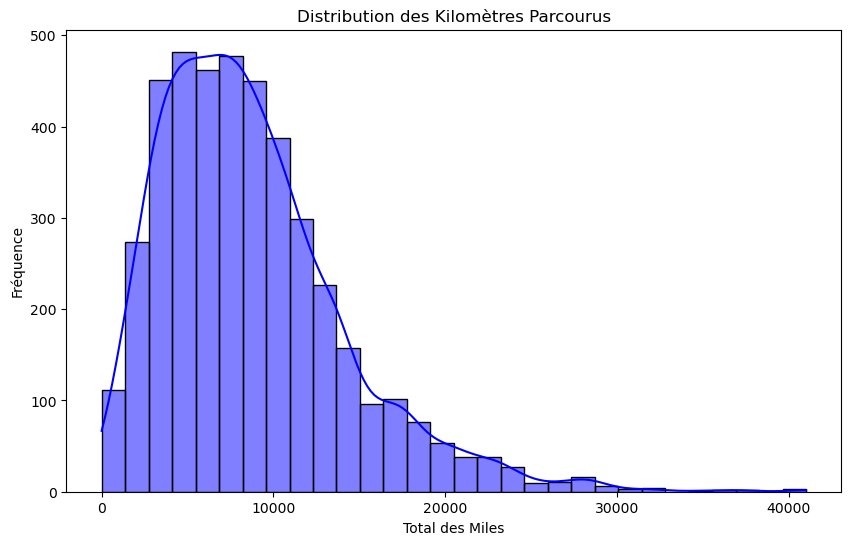

In [82]:
# Histogramme des kilomètres parcourus
plt.figure(figsize=(10, 6))
sns.histplot(data['Total.miles.driven'], bins=30, kde=True, color='blue')
plt.title('Distribution des Kilomètres Parcourus')
plt.xlabel('Total des Miles')
plt.ylabel('Fréquence')
plt.show()

**Objectif du Graphique:**

- L'objectif de cet histogramme est de présenter visuellement la distribution des distances totales parcourues en miles par an. Cette visualisation aide à comprendre les habitudes de conduite de la population étudiée, en mettant en lumière le nombre de miles généralement parcourus par an et en détectant d'éventuelles tendances ou anomalies dans les comportements de conduite.

**Interprétation:**

- La distribution des miles parcourus annuellement affiche une forme asymétrique positive, avec un pic net pour les faibles distances et une longue queue qui s'étire vers des valeurs supérieures. Cela indique que la plupart des conducteurs parcourent relativement peu de miles annuellement, mais qu'un petit nombre de conducteurs effectuent des distances beaucoup plus importantes.
  
- Le mode principal de la distribution suggère que la majorité des véhicules sont utilisés pour des trajets courts, probablement urbains ou périurbains. En revanche, la présence d'une queue longue vers les distances plus élevées pourrait signaler que certains véhicules sont utilisés pour des trajets interurbains ou pour des raisons professionnelles, impliquant des voyages longs et moins fréquents.
- La forme de cette distribution peut être cruciale pour modéliser les risques d'accidents ou pour élaborer des politiques d'assurance adaptées. En effet, supposant que les distances parcourues influencent la probabilité d'incidents et le coût des sinistres, comprendre cette distribution aide à ajuster les couvertures et à prévoir les besoins spécifiques selon les habitudes de conduite des assurés.
- Cette analyse des distances parcourues par les véhicules peut ainsi fournir des insights précieux pour des ajustements stratégiques dans les offres d'assurance ou les mesures de prévention des accidents.

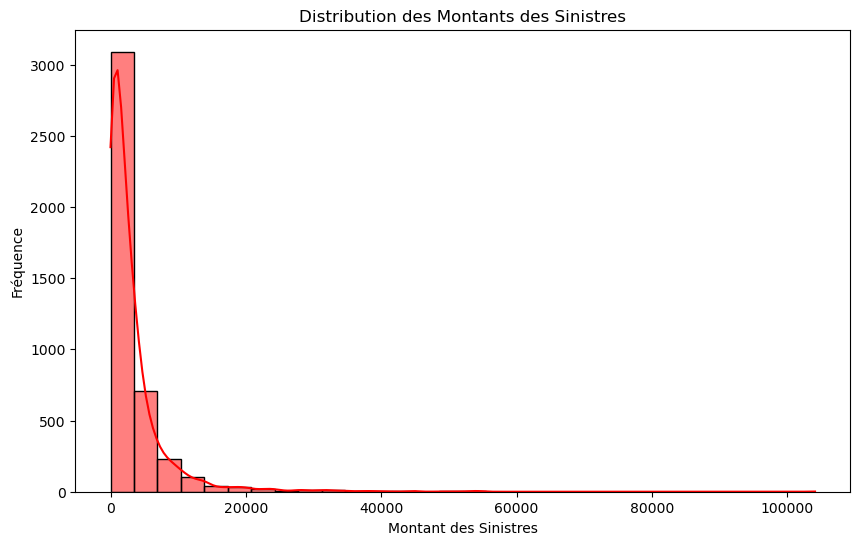

In [83]:
# Histogramme du montant des sinistres
plt.figure(figsize=(10, 6))
sns.histplot(data['AMT_Claim'], bins=30, kde=True, color='red')
plt.title('Distribution des Montants des Sinistres')
plt.xlabel('Montant des Sinistres')
plt.ylabel('Fréquence')
plt.show()

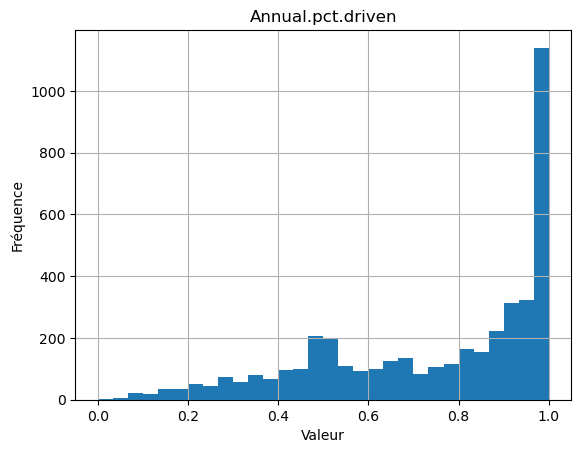

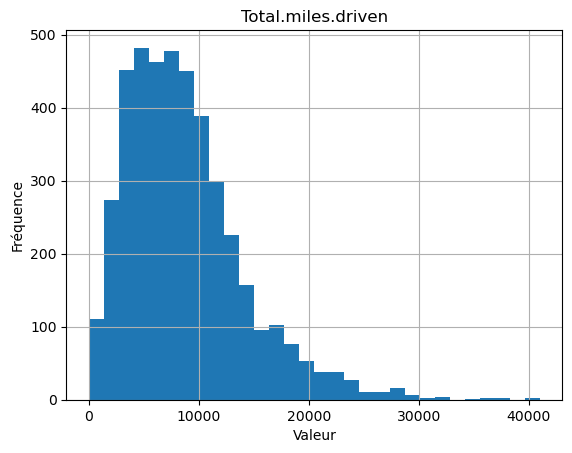

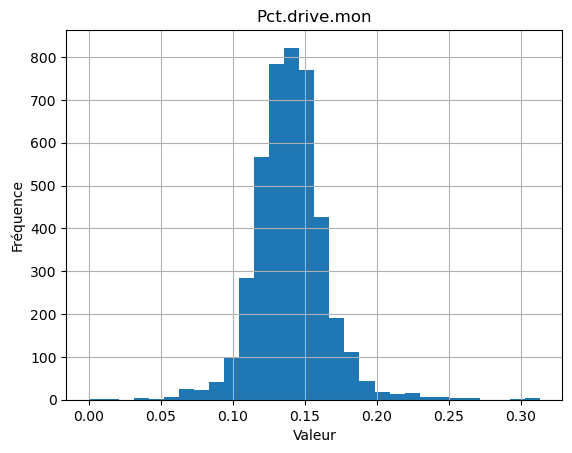

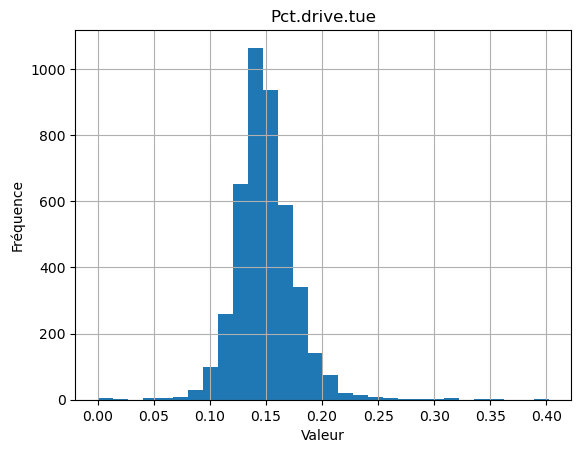

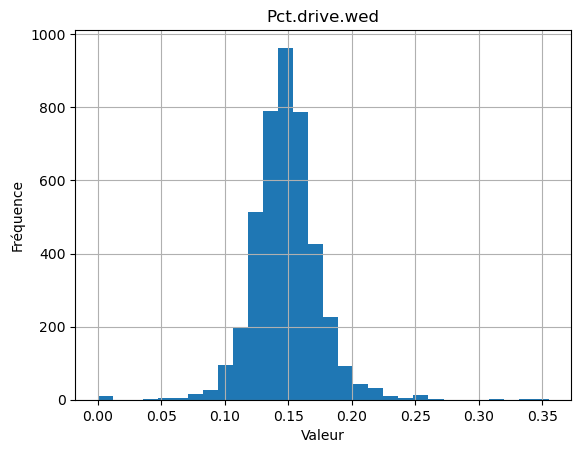

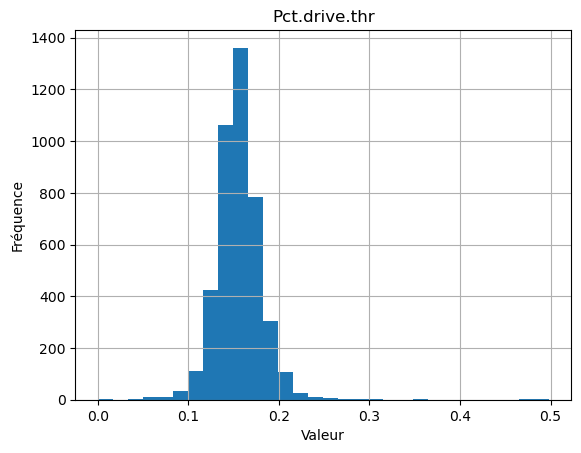

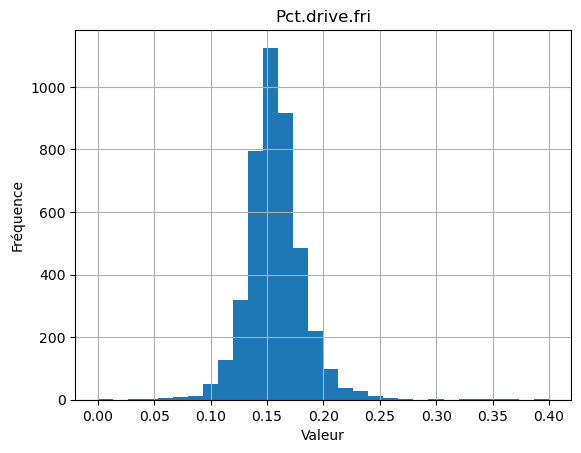

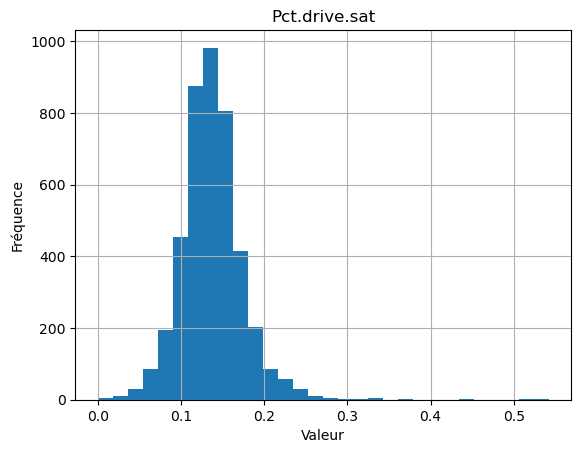

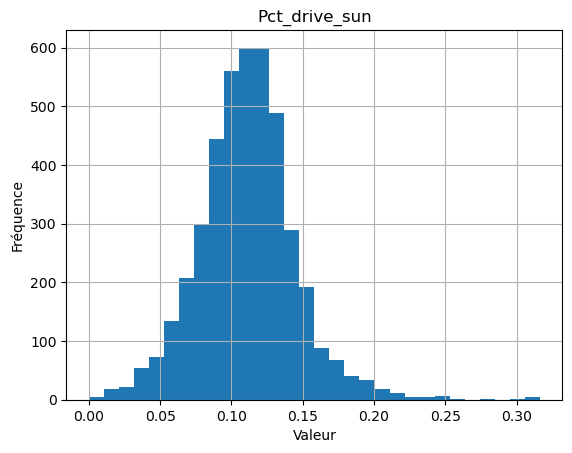

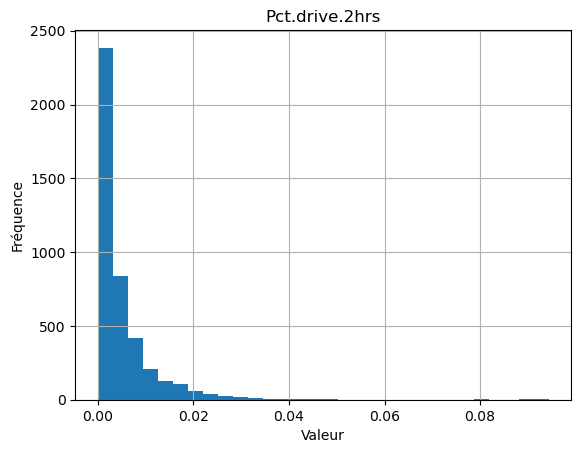

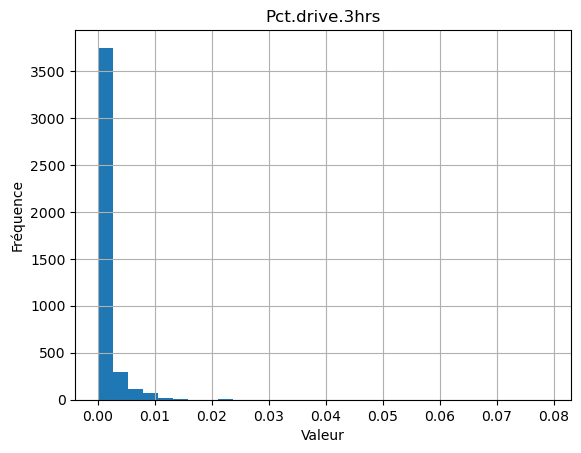

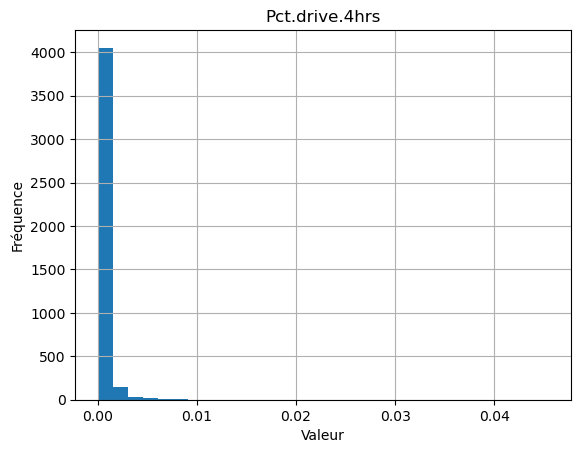

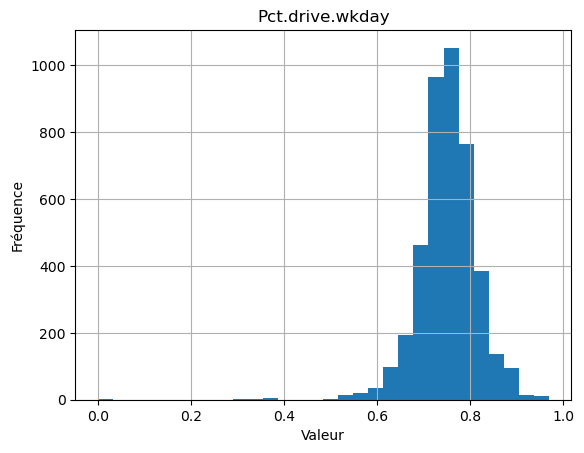

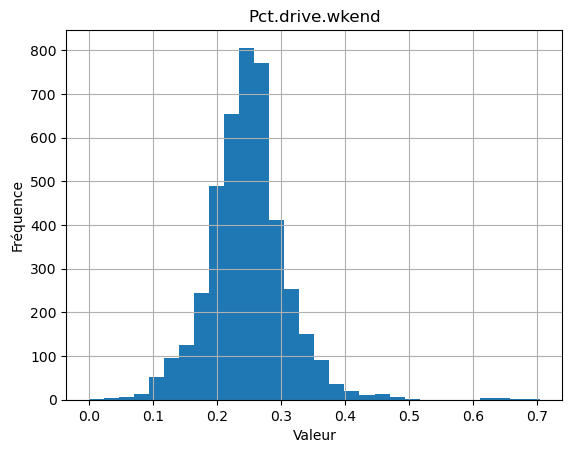

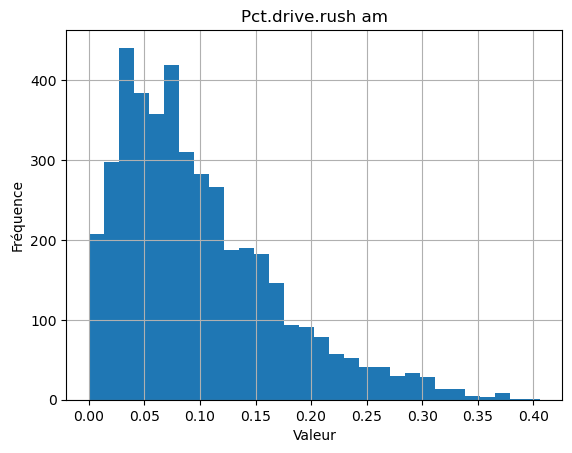

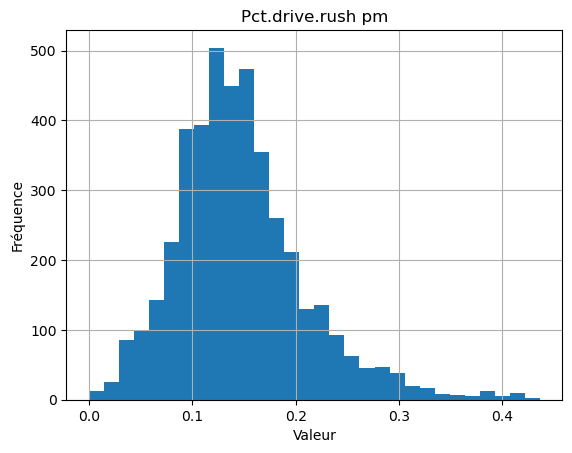

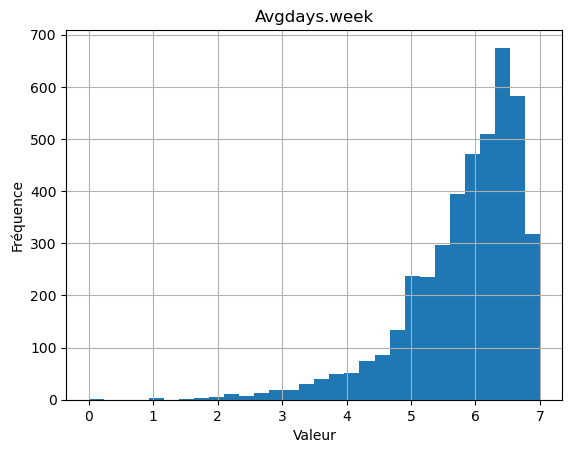

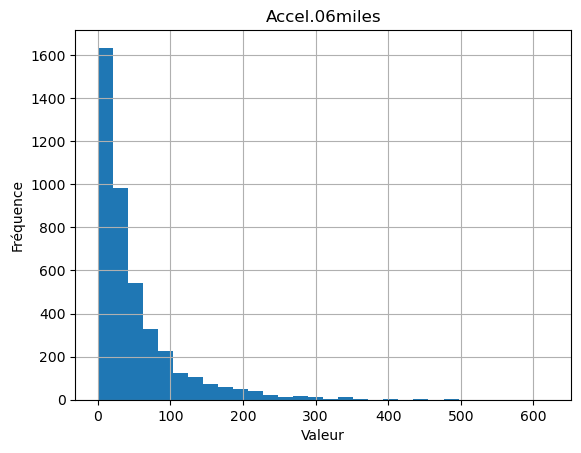

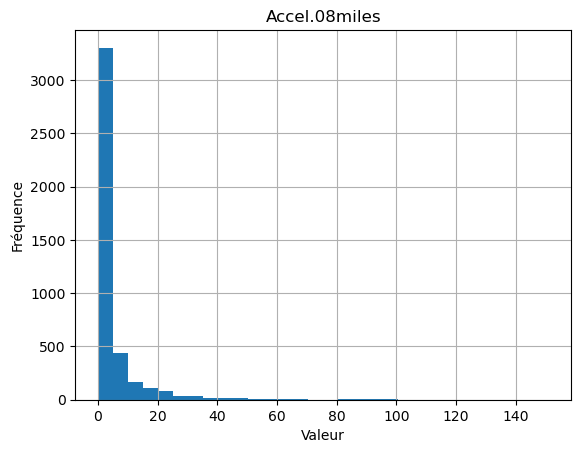

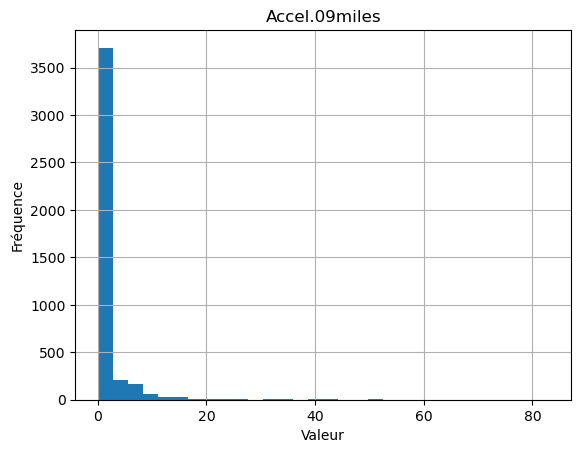

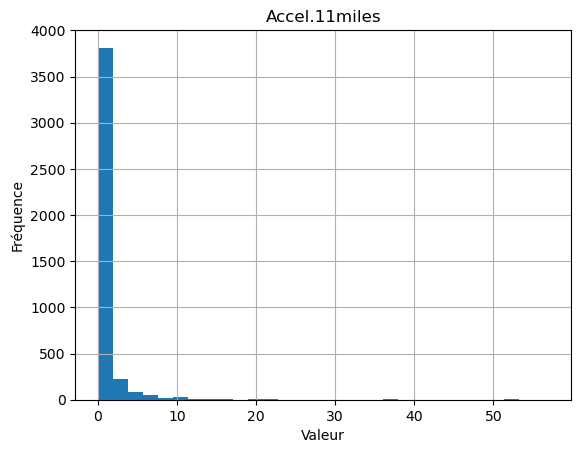

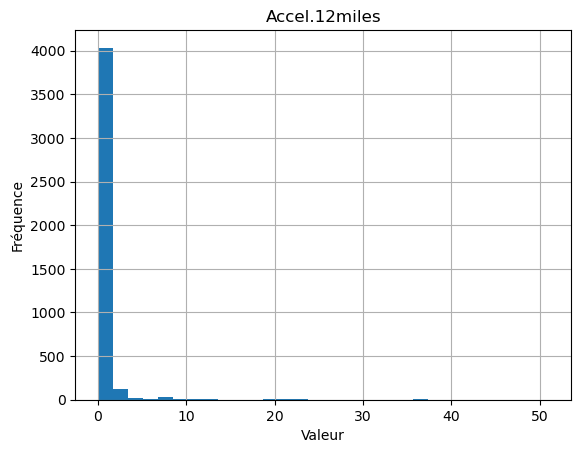

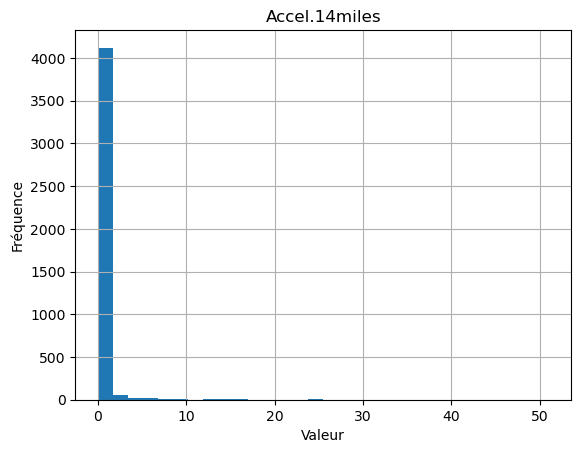

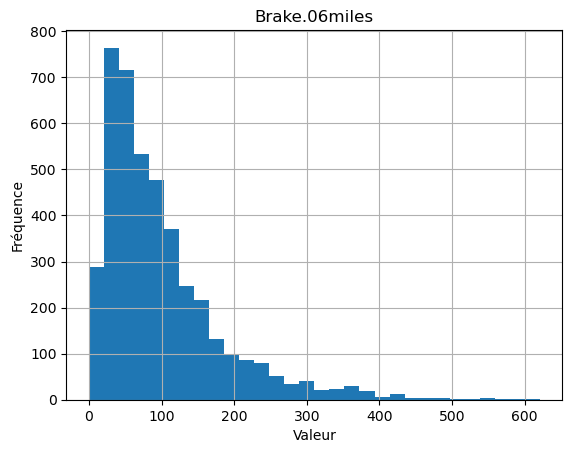

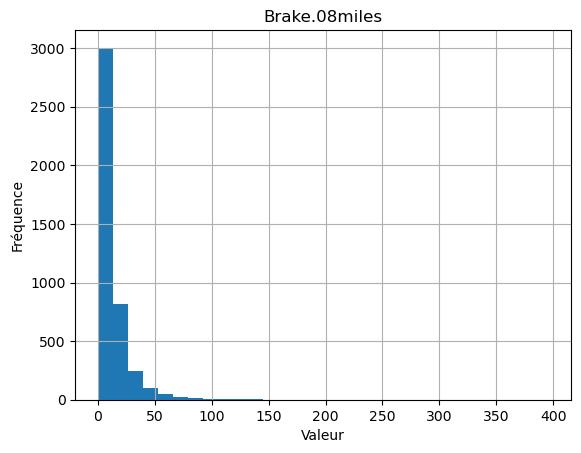

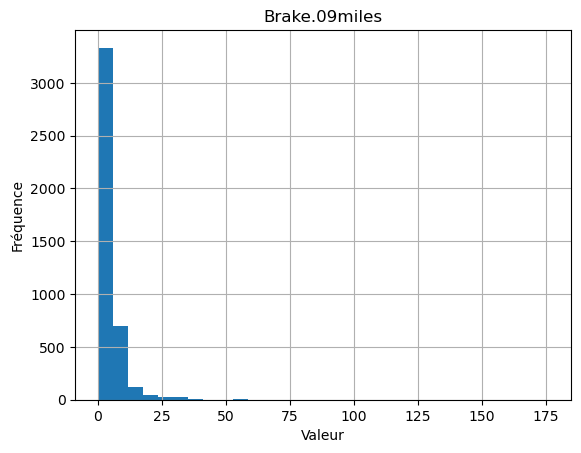

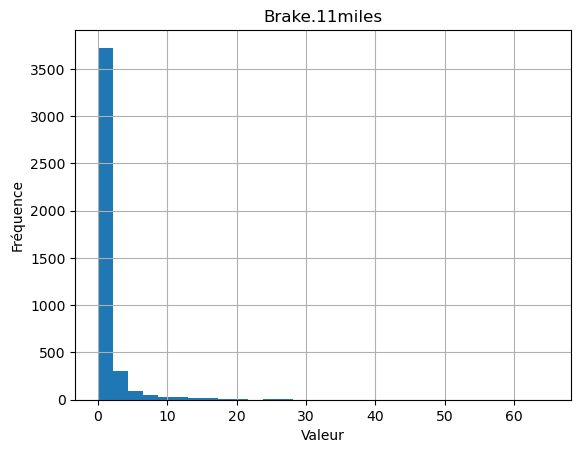

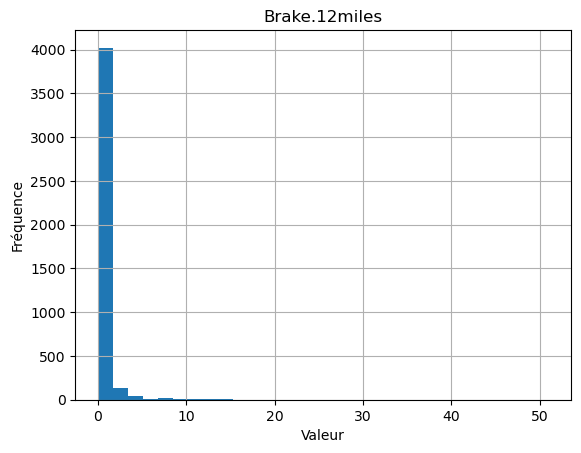

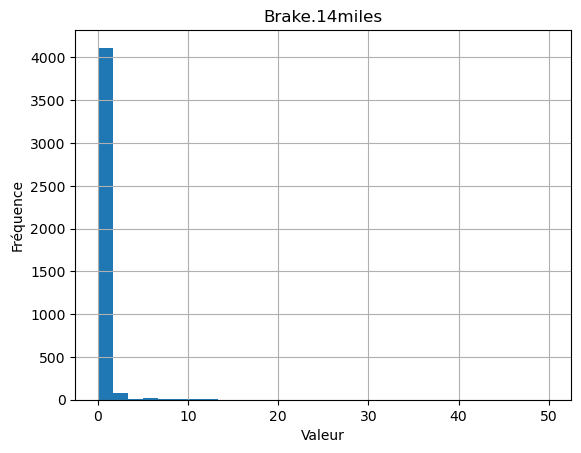

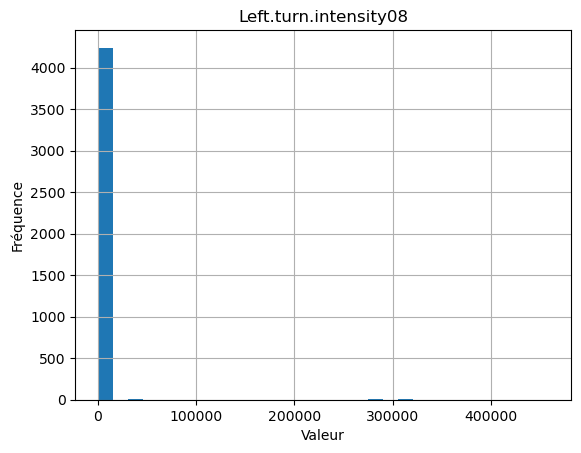

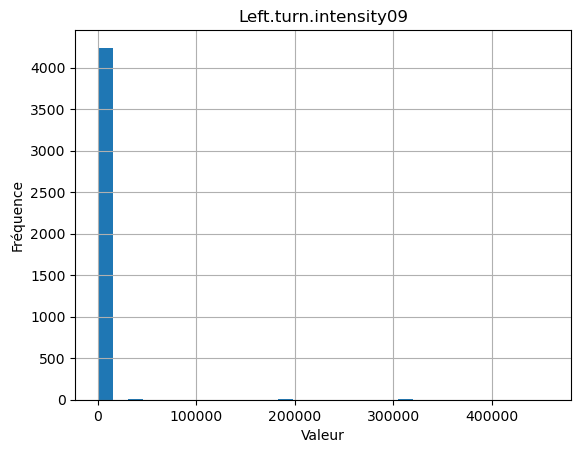

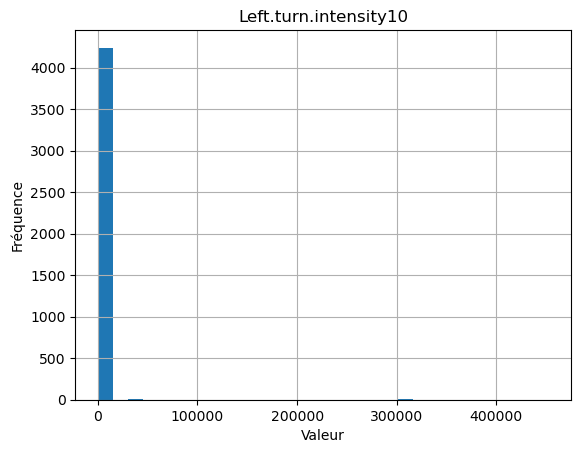

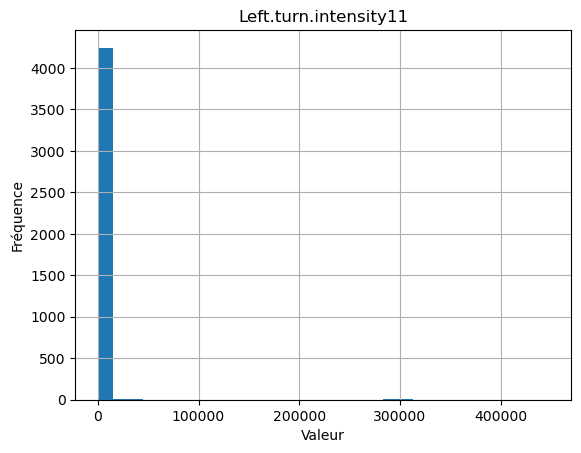

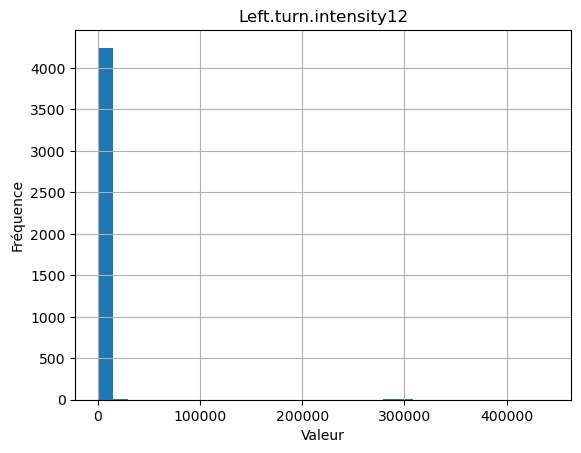

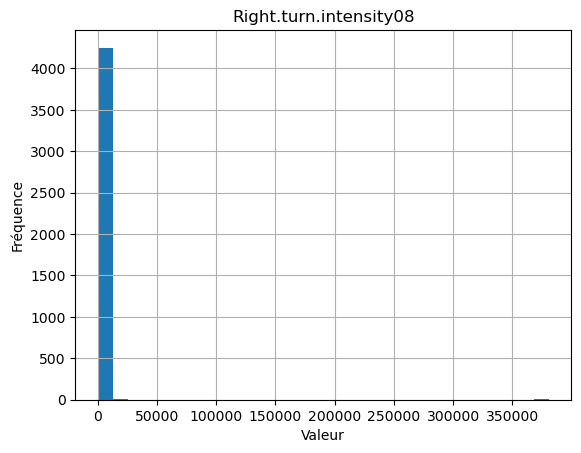

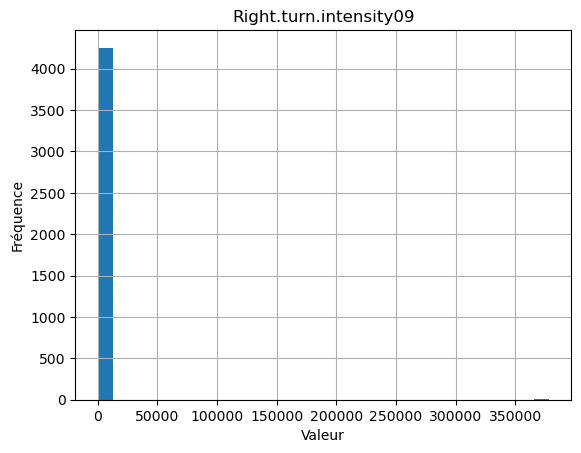

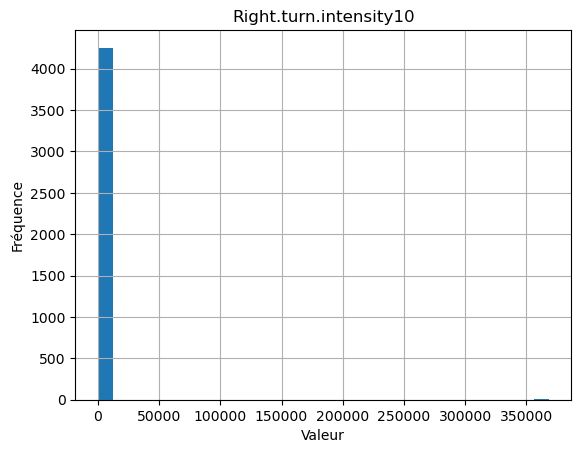

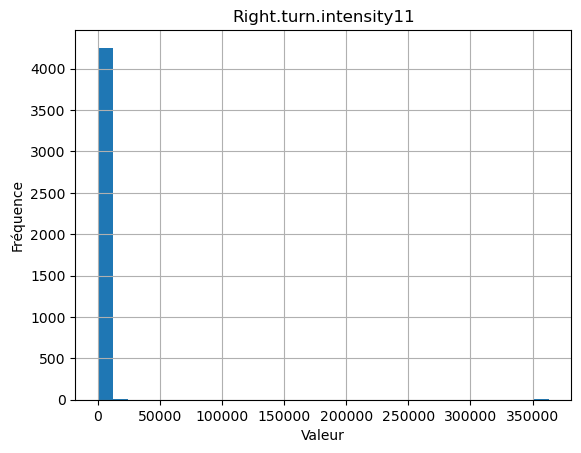

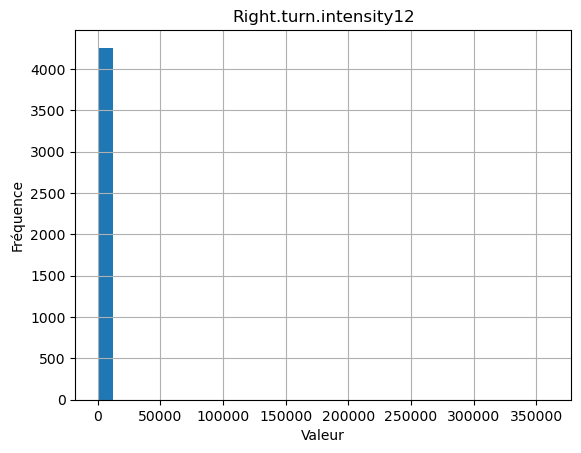

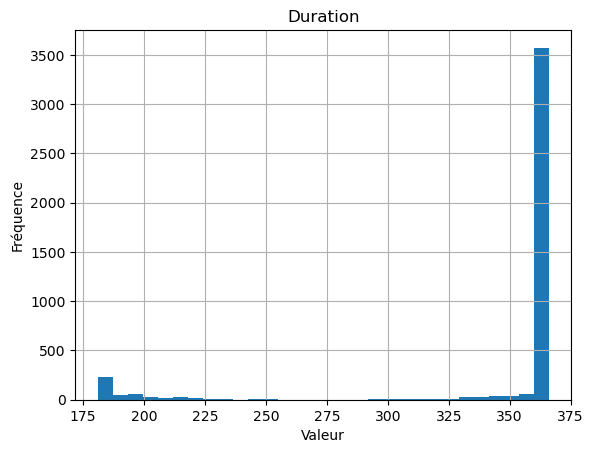

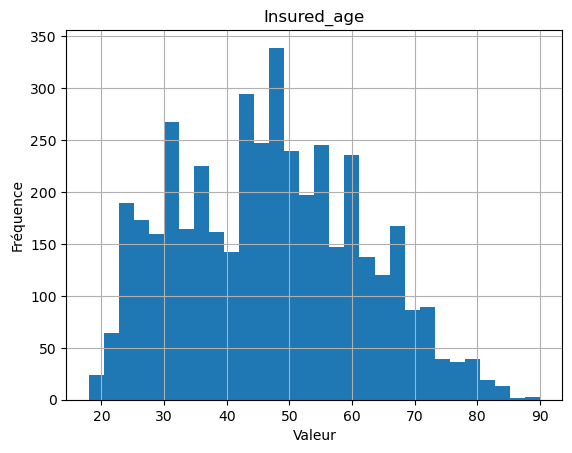

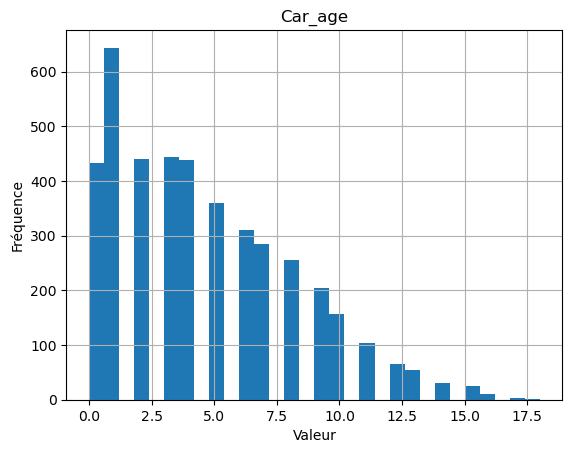

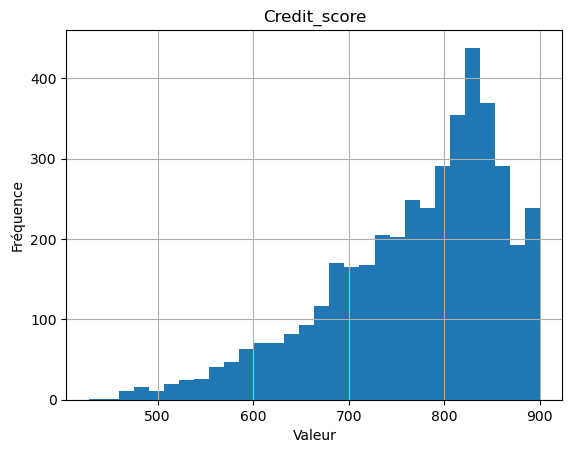

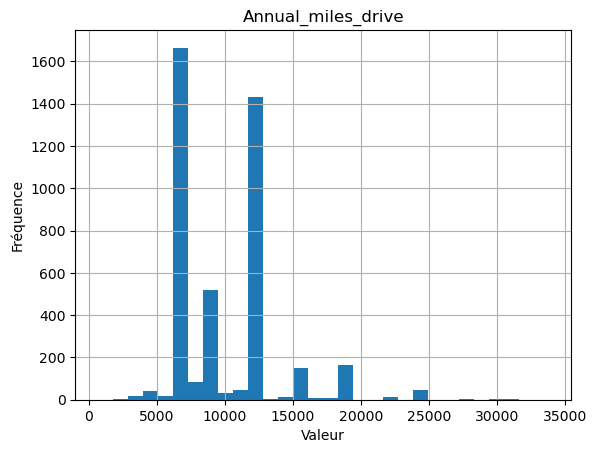

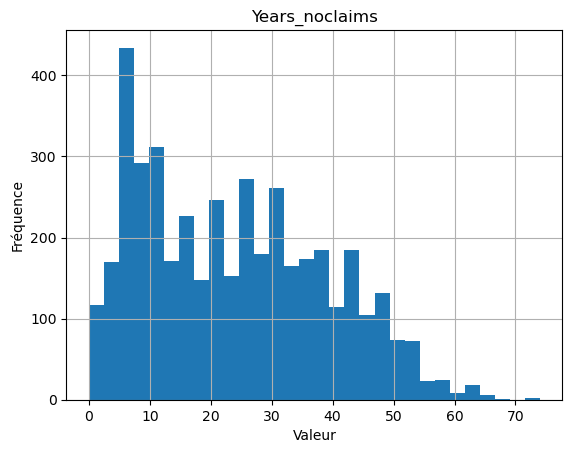

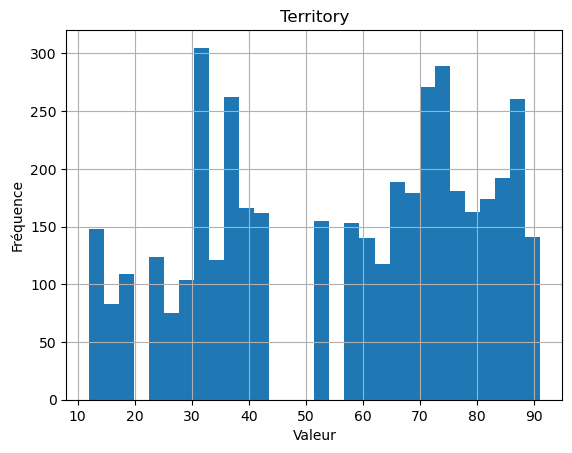

In [84]:
# Correction des noms de colonnes avec des espaces superflus
data.columns = data.columns.str.strip()

# Liste des variables à visualiser
variables = ['Annual.pct.driven', 'Total.miles.driven', 'Pct.drive.mon',
                       'Pct.drive.tue', 'Pct.drive.wed', 'Pct.drive.thr', 'Pct.drive.fri',
                       'Pct.drive.sat', 'Pct_drive_sun', 'Pct.drive.2hrs', 'Pct.drive.3hrs',
                       'Pct.drive.4hrs', 'Pct.drive.wkday', 'Pct.drive.wkend',
                       'Pct.drive.rush am', 'Pct.drive.rush pm', 'Avgdays.week',
                       'Accel.06miles', 'Accel.08miles', 'Accel.09miles', 'Accel.11miles',
                       'Accel.12miles', 'Accel.14miles', 'Brake.06miles', 'Brake.08miles',
                       'Brake.09miles', 'Brake.11miles', 'Brake.12miles', 'Brake.14miles',
                       'Left.turn.intensity08', 'Left.turn.intensity09',
                       'Left.turn.intensity10', 'Left.turn.intensity11',
                       'Left.turn.intensity12', 'Right.turn.intensity08',
                       'Right.turn.intensity09', 'Right.turn.intensity10',
                       'Right.turn.intensity11', 'Right.turn.intensity12',
                       'Duration', 'Insured_age', 'Car_age', 'Credit_score',
                       'Annual_miles_drive','Years_noclaims', 'Territory']

# Générer des histogrammes pour chaque variable
for var in variables:
    plt.figure()
    data[var].hist(bins=30)
    plt.title(var)
    plt.xlabel('Valeur')
    plt.ylabel('Fréquence')
    plt.show()

<Axes: >

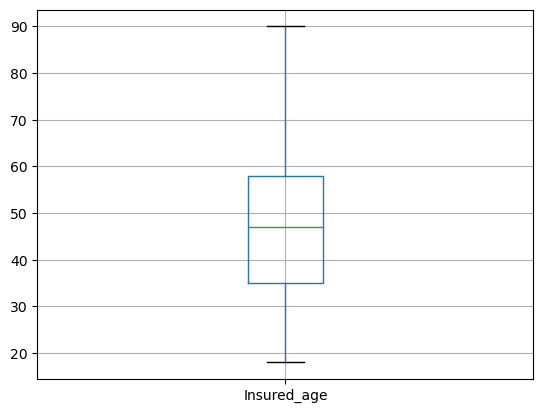

In [85]:
data.boxplot('Insured_age')

### Analyse graphique bivariée

* Analyse quantitative

**Relation entre l'âge de la voiture et le montant des sinistres**

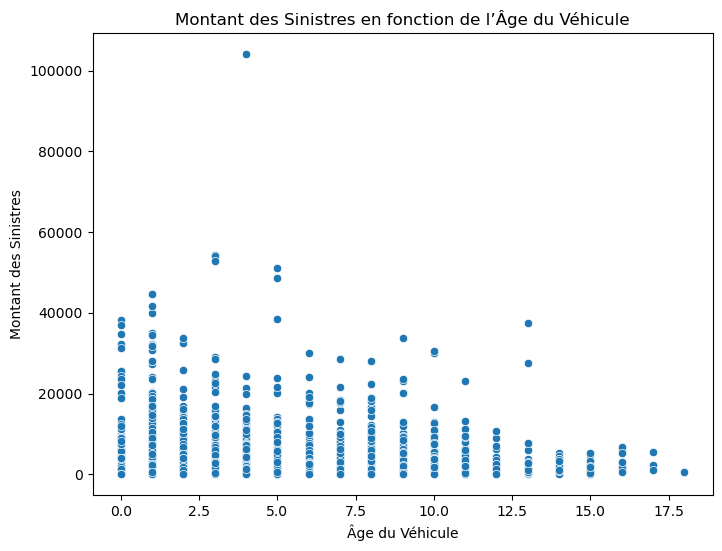

In [86]:
# Relation entre l'âge de la voiture et le montant des sinistres
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Car_age', y='AMT_Claim', data=data)
plt.title('Montant des Sinistres en fonction de l’Âge du Véhicule')
plt.xlabel('Âge du Véhicule')
plt.ylabel('Montant des Sinistres')
plt.show()

**Objectif:**
- Analyser l'influence de l'âge du véhicule sur le montant des sinistres déclarés, permettant de déterminer si les véhicules plus anciens sont associés à des sinistres plus coûteux.

**Interprétation:**
- Il ne semble pas y avoir de corrélation claire entre l'âge du véhicule et le montant des sinistres, avec des montants de sinistres élevés répartis à travers différentes tranches d'âge de véhicules.
- Les véhicules très neufs (moins de 2 ans) présentent une variété de montants de sinistres, ce qui pourrait refléter des coûts de réparation plus élevés ou une plus grande valeur à neuf.
-  Il est intéressant de noter que les véhicules entre 5 et 15 ans montrent un éventail de sinistres, suggérant que l'âge seul n'est pas un prédicteur fiable du coût des sinistres.

**Le nuage de points entre le total des Miles parcourus et Montant des Sinistres**

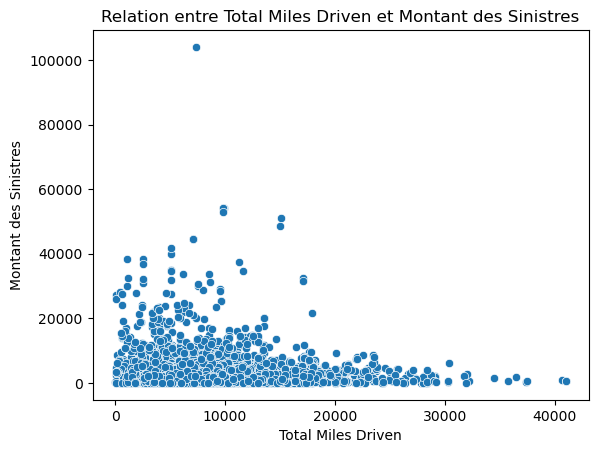

In [87]:
# Le nuage de points entre 'Total.miles.driven' et 'AMT_Claim'
sns.scatterplot(x='Total.miles.driven', y='AMT_Claim', data=data)
plt.title('Relation entre Total Miles Driven et Montant des Sinistres')
plt.xlabel('Total Miles Driven')
plt.ylabel('Montant des Sinistres')
plt.show()

**Objectif:**
- Observer la corrélation entre le nombre total de miles parcourus et le montant des sinistres déclarés, ce qui pourrait indiquer si une utilisation plus intensive du véhicule est associée à des coûts de sinistres plus élevés.

**Interprétation:**
- Les données suggèrent qu'il y a peu de relation directe entre le nombre total de miles parcourus et le montant des sinistres déclarés, avec beaucoup de variabilité dans les montants des sinistres même pour des nombres de miles similaires. Toutefois, il semble y avoir une tendance à des montants de sinistres plus élevés pour des véhicules ayant parcouru un plus grand nombre de miles.
  
- Une tendance à la hausse pourrait suggérer que plus un véhicule parcourt de miles, plus le montant des sinistres est élevé

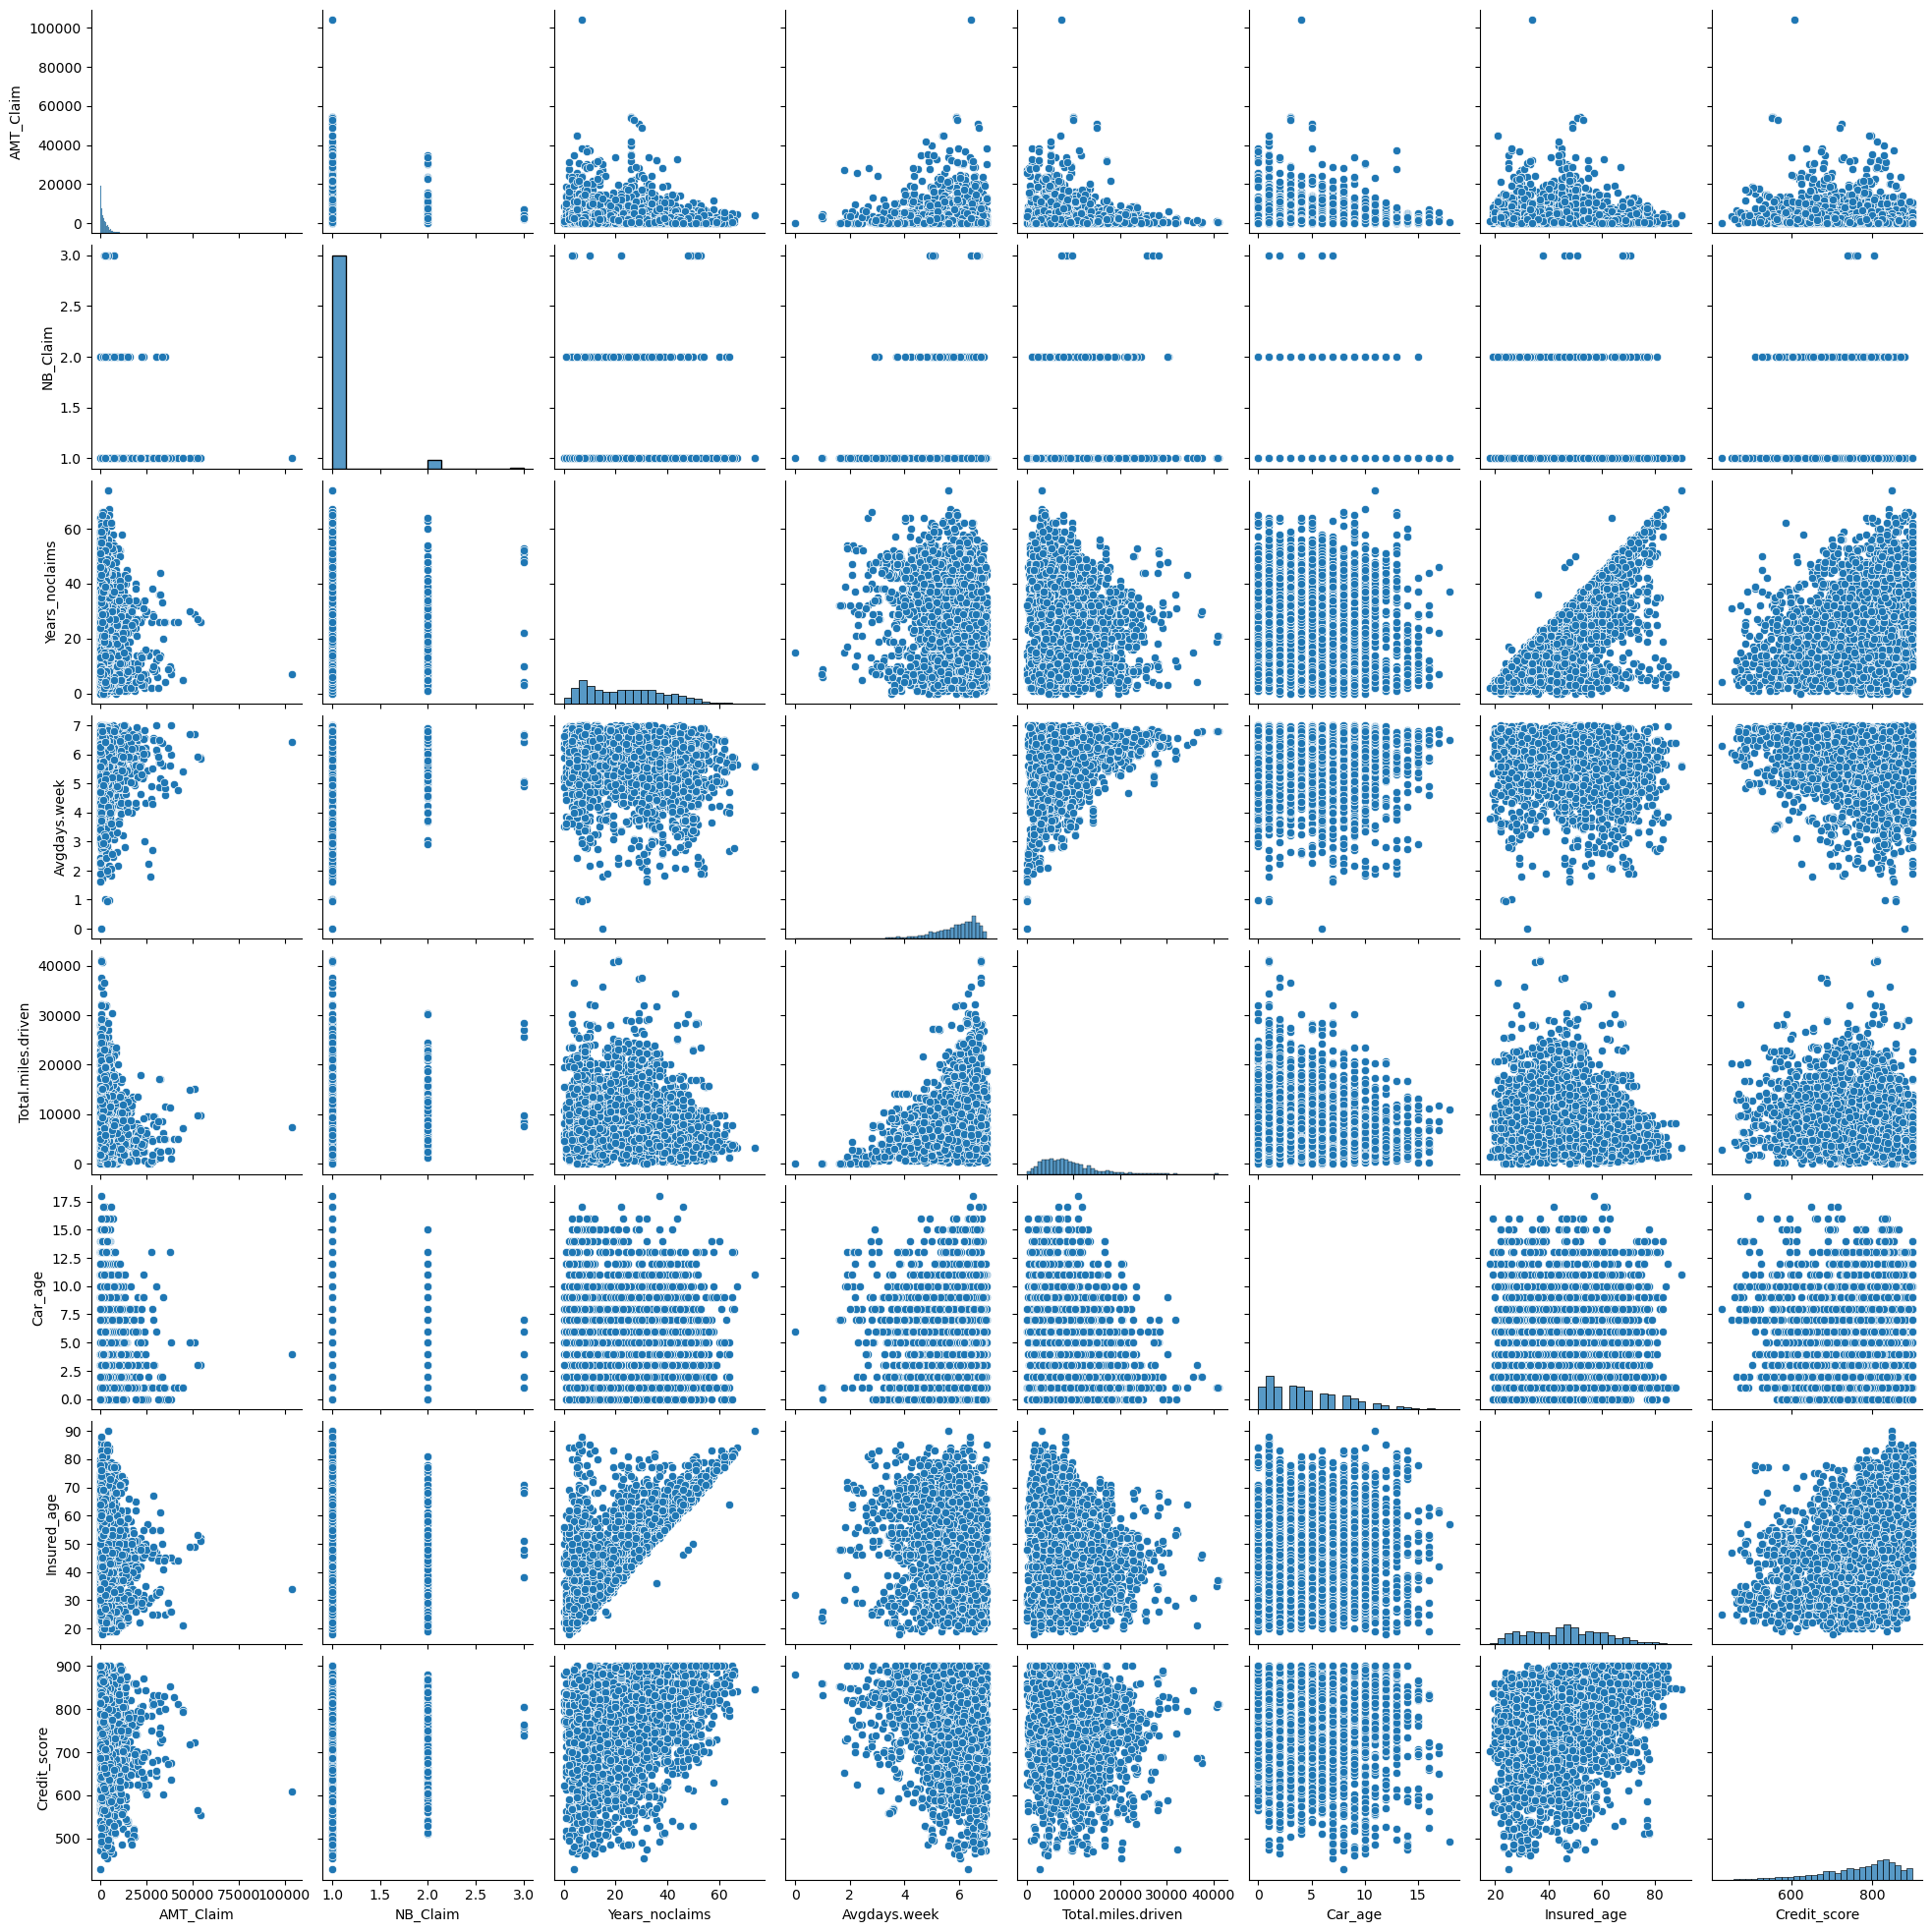

In [88]:
# Visualisation des distributions et des relations
sns.pairplot(data[['AMT_Claim','NB_Claim','Years_noclaims','Avgdays.week','Total.miles.driven','Car_age', 'Insured_age', 'Credit_score']])
plt.show()

Ce graphique transcrit les relations linéaires et monotones entre notre variable cible et les variables de explicatives

* Diagrammes de dispersion pour les corrélations

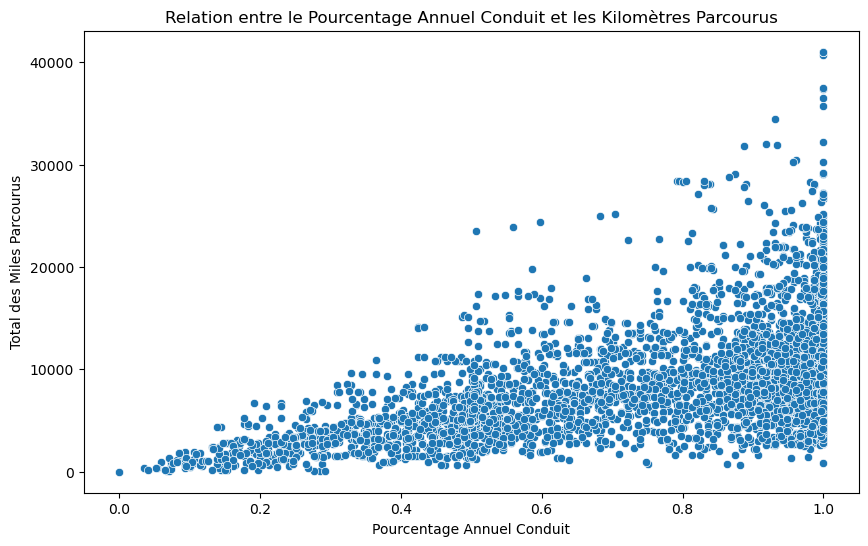

In [89]:
# Scatter plot de Annual.pct.driven vs Total.miles.driven
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual.pct.driven', y='Total.miles.driven', data=data)
plt.title('Relation entre le Pourcentage Annuel Conduit et les Kilomètres Parcourus')
plt.xlabel('Pourcentage Annuel Conduit')
plt.ylabel('Total des Miles Parcourus')
plt.show()

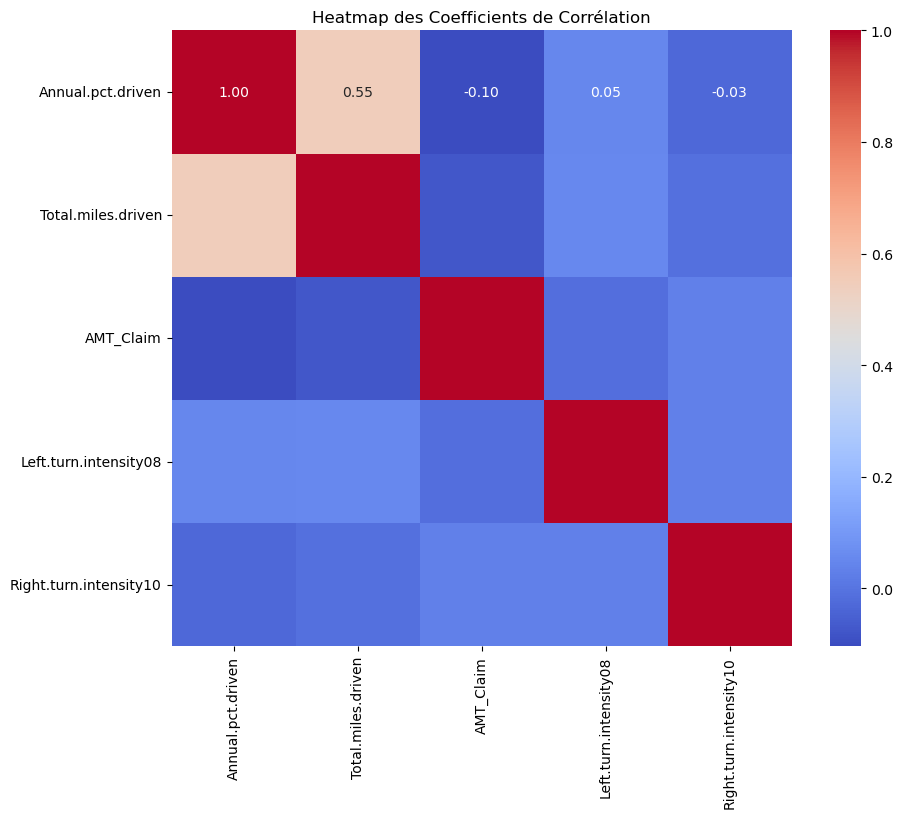

In [90]:
# Matrice de corrélation
corr_matrix = data[['Annual.pct.driven', 'Total.miles.driven', 'AMT_Claim', 'Left.turn.intensity08', 'Right.turn.intensity10']].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap des Coefficients de Corrélation')
plt.show()

* Analyse qualitative

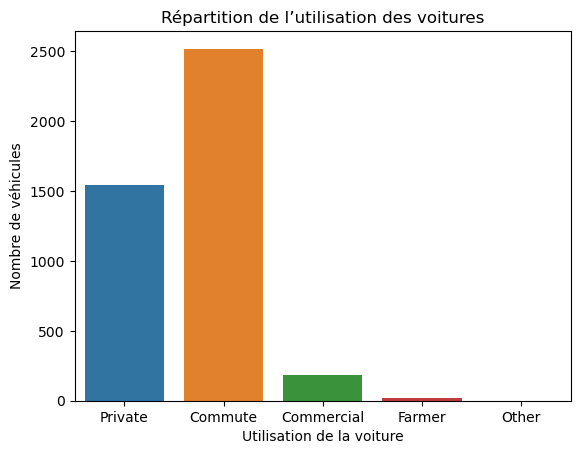

In [91]:
# diagramme à barres pour une variable qualitative 'Car_use'
sns.countplot(x='Car_use', data=data)
plt.title('Répartition de l’utilisation des voitures')
plt.xlabel('Utilisation de la voiture')
plt.ylabel('Nombre de véhicules')
plt.show()

**Objectif:**
- Notre but est d'illustrer la fréquence de l’utilisation des voitures selon différentes catégories (Commuter, Private, Commercial, Farmer, Other), permettant de visualiser les habitudes ou les besoins de déplacement associés à chaque catégorie.

**Interprétation:**
- La catégorie "Commuter" semble avoir le plus grand nombre de véhicules, ce qui pourrait indiquer que la majorité des véhicules dans l'échantillon sont utilisés pour les trajets quotidiens.
- Les véhicules à usage privé suivent de près, tandis que les usages commercial, agricole et autre sont nettement moins représentés.

- Cette information pourrait être utile pour des stratégies d'assurance ciblées ou pour comprendre la pression sur les infrastructures urbaines dues aux déplacements quotidiens.

**Graphique en Boîte pour Variable Quantitative-Qualitative**

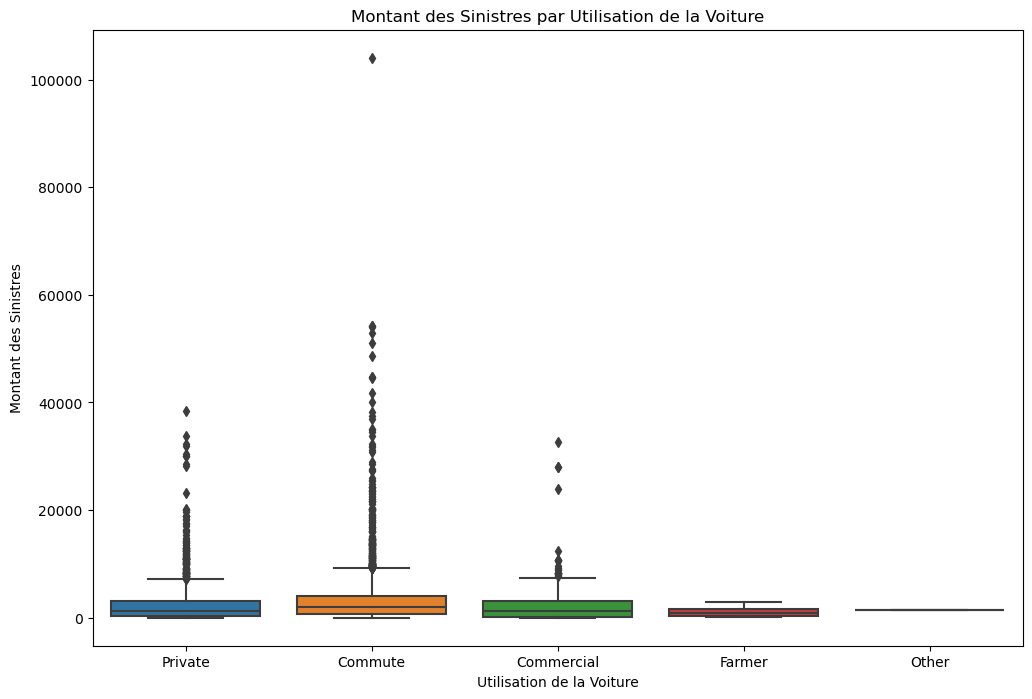

In [92]:
# Boxplot des montants des sinistres par utilisation de la voiture
plt.figure(figsize=(12, 8))
sns.boxplot(x='Car_use', y='AMT_Claim', data=data)
plt.title('Montant des Sinistres par Utilisation de la Voiture')
plt.xlabel('Utilisation de la Voiture')
plt.ylabel('Montant des Sinistres')
plt.show()

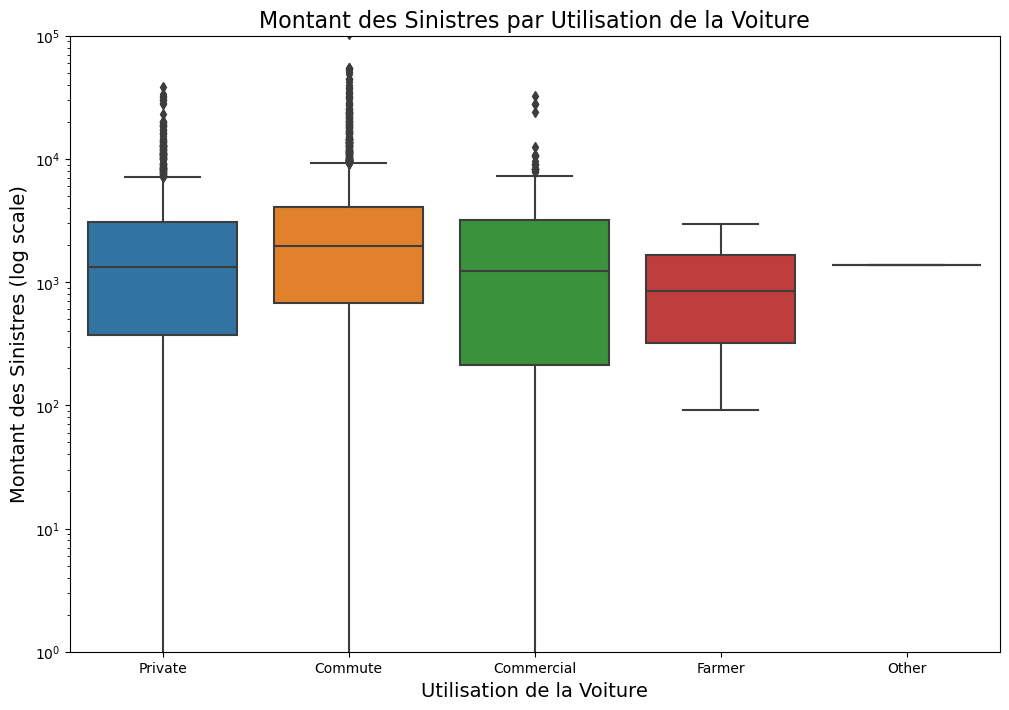

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Augmenter la taille du graphique
plt.figure(figsize=(12, 8))

# Créer un boxplot avec une échelle logarithmique sur l'axe des y
sns.boxplot(x='Car_use', y='AMT_Claim', data=data)
plt.yscale('log')  # Appliquer l'échelle logarithmique

# Améliorer les labels des axes et le titre
plt.xlabel('Utilisation de la Voiture', fontsize=14)
plt.ylabel('Montant des Sinistres (log scale)', fontsize=14)
plt.title('Montant des Sinistres par Utilisation de la Voiture', fontsize=16)

# Ajuster les limites pour mieux visualiser les données
plt.ylim(1, 100000)  # Les valeurs doivent être adaptées en fonction de vos données

# Afficher le graphique
plt.show()


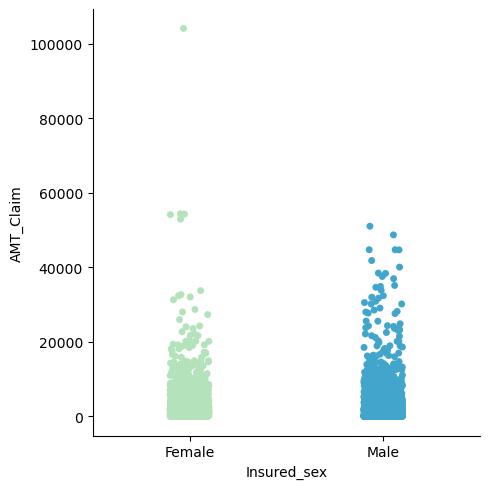

In [94]:
sns.catplot(x="Insured_sex", y = 'AMT_Claim', kind = "strip", data=data, palette="GnBu")

In [95]:
data.columns

Index(['Unnamed: 0', 'Id_pol', 'Annual.pct.driven', 'Total.miles.driven',
       'Pct.drive.mon', 'Pct.drive.tue', 'Pct.drive.wed', 'Pct.drive.thr',
       'Pct.drive.fri', 'Pct.drive.sat', 'Pct_drive_sun', 'Pct.drive.2hrs',
       'Pct.drive.3hrs', 'Pct.drive.4hrs', 'Pct.drive.wkday',
       'Pct.drive.wkend', 'Pct.drive.rush am', 'Pct.drive.rush pm',
       'Avgdays.week', 'Accel.06miles', 'Accel.08miles', 'Accel.09miles',
       'Accel.11miles', 'Accel.12miles', 'Accel.14miles', 'Brake.06miles',
       'Brake.08miles', 'Brake.09miles', 'Brake.11miles', 'Brake.12miles',
       'Brake.14miles', 'Left.turn.intensity08', 'Left.turn.intensity09',
       'Left.turn.intensity10', 'Left.turn.intensity11',
       'Left.turn.intensity12', 'Right.turn.intensity08',
       'Right.turn.intensity09', 'Right.turn.intensity10',
       'Right.turn.intensity11', 'Right.turn.intensity12', 'NB_Claim',
       'AMT_Claim', 'Duration', 'Insured_age', 'Insured_sex', 'Car_age',
       'Marital', 'Car_use', 

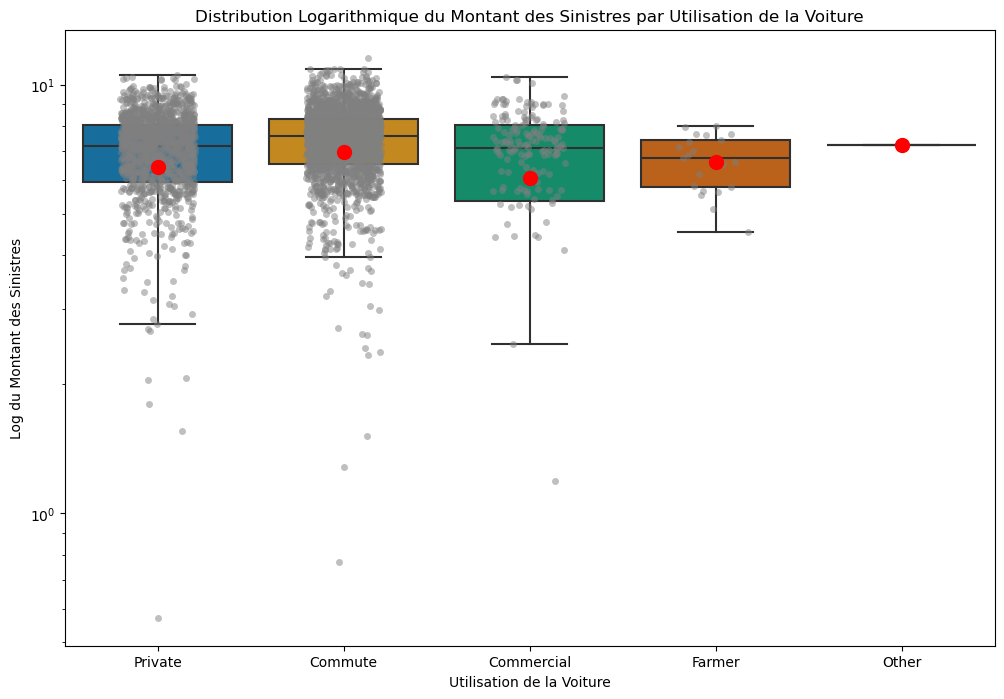

In [96]:
# Préparation des données
data['Log_AMT_Claim'] = np.log(data['AMT_Claim'] + 1)  # Transformation logarithmique pour une meilleure visualisation

plt.figure(figsize=(12, 8))  # Ajustement de la taille du graphique pour une meilleure lisibilité

# Création du boxplot
sns.boxplot(x='Car_use', y='Log_AMT_Claim', data=data, palette="colorblind", showfliers=False)

# Ajout du stripplot pour montrer la distribution des données
sns.stripplot(x='Car_use', y='Log_AMT_Claim', data=data, color='grey', alpha=0.5, jitter=0.2)

# Calcul et affichage des moyennes sur le graphique
means = data.groupby('Car_use')['Log_AMT_Claim'].mean()
plt.scatter(means.index, means.values, color='red', s=100, label='Moyenne', zorder=5)  # Utilisation de zorder pour mettre en avant

# Ajout de labels explicatifs
plt.title('Distribution Logarithmique du Montant des Sinistres par Utilisation de la Voiture')
plt.xlabel('Utilisation de la Voiture')
plt.ylabel('Log du Montant des Sinistres')
plt.yscale('log')  # Utilisation de l'échelle


**Objectif du Graphique:**
- L'objectif de ce graphique est de comparer les distributions des montants des sinistres en fonction de l'utilisation de la voiture. Il permet d'évaluer si le type d'utilisation de la voiture (par exemple, trajet quotidien, usage privé, usage commercial, etc.) a une influence sur le montant des sinistres déclarés.
- Nous avons utiliser une échelle logarithmique, afin de visualiser efficacement la distribution des sinistres sur plusieurs ordres de grandeur.

**Interprétation:**

- La distribution des montants des sinistres pour chaque catégorie d'utilisation de la voiture montre une large variabilité, comme indiqué par la dispersion des points.
  
- Les points rouges indiquent les moyennes de chaque catégorie. On peut noter que certaines catégories, comme `commute`, ont une moyenne plus élevée que d'autres, ce qui suggère que les sinistres déclarés pour l'utilisation commune et commerciale sont généralement plus élevés.
  
- **Variabilité et Valeurs Extrêmes** : Des points éloignés de la masse principale indiquent des valeurs extrêmes. Ces valeurs sont plus fréquentes dans les catégories `Commute` et `Private`, indiquant des sinistres particulièrement élevés dans ces groupes.
  
- **Fréquence des Sinistres** : Il semble que les catégories `Commute` et `Private` aient un plus grand nombre de sinistres signalés par rapport aux catégories comme `Farmer` et `Other`, comme on peut le voir par la densité des points.

In [97]:
# Repartion de la region des assurés 

<Axes: ylabel='count'>

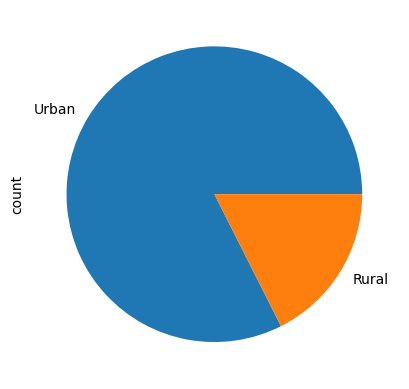

In [98]:
data.Region.value_counts().plot.pie()

## Analyse Exploratoire et selection de variables

In [99]:
data= pd.read_csv("C:/Users/Skodon/Downloads/DU big data/DB_TELEMATICS_PROPRE_I.csv", sep=',')

In [100]:
data.head()

Unnamed: 0  Id_pol  Annual.pct.driven  Total.miles.driven  Pct.drive.mon  \
0           0  212355           0.600000         5563.385340       0.143993   
1           1  171111           0.676712         5105.247008       0.119403   
2           2  199324           0.315068         3530.909423       0.130443   
3           3  160668           0.936986        20508.520881       0.145544   
4           4  195403           0.520548         7636.937993       0.180197   

   Pct.drive.tue  Pct.drive.wed  Pct.drive.thr  Pct.drive.fri  Pct.drive.sat  \
0       0.166667       0.130723       0.141441       0.140170       0.151941   
1       0.201306       0.155285       0.137793       0.153848       0.130376   
2       0.161078       0.162398       0.161848       0.131379       0.128151   
3       0.176017       0.194093       0.155184       0.165195       0.097721   
4       0.155260       0.132919       0.155620       0.172082       0.134563   

   Pct_drive_sun  Pct.drive.2hrs  Pct.drive.3hrs  Pct.drive.4hrs  \
0       0.125065        0.003748        0.002249        0.000000   
1       0.101989        0.002129        0.000188        0.000000   
2       0.124703        0.000000        0.000000        0.000000   
3       0.066246        0.005739        0.000000        0.000000   
4       0.069360        0.000827        0.000236        0.000118   

   Pct.drive.wkday  Pct.drive.wkend  Pct.drive.rush am  Pct.drive.rush pm  \
0         0.722489         0.277511           0.124964           0.147482   
1         0.768119         0.231881           0.078812           0.127525   
2         0.745278         0.254722           0.116910           0.120902   
3         0.838405         0.161595           0.172026           0.146229   
4         0.797636         0.202364           0.114681           0.082364   

   Avgdays.week  Accel.06miles  Accel.08miles  Accel.09miles  Accel.11miles  \
0      5.174964           37.0            3.0            1.0            1.0   
1      5.694061            4.0            0.0            0.0            0.0   
2      6.485414           80.0            6.0            1.0            0.0   
3      5.973921           67.0            6.0            1.0            1.0   
4      5.182271           70.0           10.0            2.0            0.0   

   Accel.12miles  Accel.14miles  Brake.06miles  Brake.08miles  Brake.09miles  \
0            1.0            1.0          174.0           27.0            7.0   
1            0.0            0.0           53.0            5.0            1.0   
2            0.0            0.0          106.0           13.0            4.0   
3            0.0            0.0          129.0           12.0            4.0   
4            0.0            0.0           49.0            5.0            1.0   

   Brake.11miles  Brake.12miles  Brake.14miles  Left.turn.intensity08  \
0            2.0            1.0            0.0                  647.0   
1            1.0            0.0            0.0                  291.0   
2            1.0            1.0            0.0                 1049.0   
3            1.0            1.0            0.0                  593.0   
4            0.0            0.0            0.0                  969.0   

   Left.turn.intensity09  Left.turn.intensity10  Left.turn.intensity11  \
0                  265.0                   53.0                   14.0   
1                  103.0                   21.0                    7.0   
2                  447.0                  114.0                   41.0   
3                  310.0                  117.0                   60.0   
4                  542.0                  178.0                   75.0   

   Left.turn.intensity12  Right.turn.intensity08  Right.turn.intensity09  \
0                    3.0                   666.0                   310.0   
1                    1.0                   622.0                   324.0   
2                   15.0                  2131.0                  1145.0   
3                   30.0       

In [101]:
# Suppression de la colonne 'Unnamed: 0' et 'Id_pol'
if 'Unnamed: 0' in data.columns:
    data.drop('Unnamed: 0', axis=1, inplace=True)
if 'Id_pol' in data.columns:
    data.drop('Id_pol', axis=1, inplace=True)

In [102]:
### Statistique descriptive

In [103]:
data.describe()

Annual.pct.driven  Total.miles.driven  Pct.drive.mon  Pct.drive.tue  \
count        4265.000000         4265.000000    4265.000000    4265.000000   
mean            0.745556         8733.346691       0.140231       0.149537   
std             0.250680         5440.226540       0.024467       0.027052   
min             0.000000            0.000000       0.000000       0.000000   
25%             0.528767         4781.474900       0.125705       0.134060   
50%             0.835616         7771.437760       0.139512       0.147482   
75%             0.972603        11359.415890       0.152920       0.163481   
max             1.000000        41019.575280       0.313402       0.402107   

       Pct.drive.wed  Pct.drive.thr  Pct.drive.fri  Pct.drive.sat  \
count    4265.000000    4265.000000    4265.000000    4265.000000   
mean        0.148361       0.155797       0.157365       0.137280   
std         0.025731       0.025964       0.025779       0.037847   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.133390       0.141850       0.142969       0.115576   
50%         0.148329       0.154633       0.156138       0.134920   
75%         0.162158       0.168852       0.170147       0.155885   
max         0.355114       0.498004       0.399737       0.542069   

       Pct_drive_sun  Pct.drive.2hrs  Pct.drive.3hrs  Pct.drive.4hrs  \
count    4265.000000     4265.000000     4265.000000     4265.000000   
mean        0.111196        0.004863        0.001083        0.000261   
std         0.034005        0.007178        0.002644        0.001177   
min         0.000000        0.000000        0.000000        0.000000   
25%         0.091134        0.000851        0.000000        0.000000   
50%         0.111366        0.002671        0.000071        0.000000   
75%         0.130292        0.006067        0.001000        0.000000   
max         0.316334        0.094364        0.079118        0.045493   

       Pct.drive.wkday  Pct.drive.wkend  Pct.drive.rush am  Pct.drive.rush pm  \
count      4265.000000      4265.000000        4265.000000        4265.000000   
mean          0.751253         0.248513           0.099470           0.146382   
std           0.062574         0.061625           0.071196           0.062386   
min           0.000000         0.000000           0.000000           0.000000   
25%           0.720419         0.212492           0.045338           0.104821   
50%           0.751195         0.248787           0.082742           0.139980   
75%           0.787501         0.279579           0.138242           0.176975   
max           0.968488         0.704628           0.405998           0.436178   

       Avgdays.week  Accel.06miles  Accel.08miles  Accel.09miles  \
count   4265.000000    4265.000000    4265.000000    4265.000000   
mean       5.825696      50.949590       5.161547       1.770223   
std        0.895001      61.802605      11.312565       5.251749   
min        0.000000       0.000000       0.000000       0.000000   
25%        5.401058      13.000000       1.000000       0.000000   
50%        6.036591      30.000000       2.000000       1.000000   
75%        6.489743      64.000000       4.000000       1.000000   
max        7.000000     621.000000     151.000000      83.000000   

       Accel.11miles  Accel.12miles  Accel.14miles  Brake.06miles  \
count    4265.000000    4265.000000    4265.000000    4265.000000   
mean        0.866823       0.461430       0.300821      99.086753   
std         3.333424       2.256006       1.738069      82.379470   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000      42.000000   
50%         0.000000       0.000000       0.000000      75.000000   
75%         1.000000       0.000000       0.000000     129.000000   
max        57.000000      51.000000      51.000000     621.000000   

       Brake.08miles  Brake.09miles  Brake.11miles  Brake.12miles  \

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4265 entries, 0 to 4264
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Annual.pct.driven       4265 non-null   float64
 1   Total.miles.driven      4265 non-null   float64
 2   Pct.drive.mon           4265 non-null   float64
 3   Pct.drive.tue           4265 non-null   float64
 4   Pct.drive.wed           4265 non-null   float64
 5   Pct.drive.thr           4265 non-null   float64
 6   Pct.drive.fri           4265 non-null   float64
 7   Pct.drive.sat           4265 non-null   float64
 8   Pct_drive_sun           4265 non-null   float64
 9   Pct.drive.2hrs          4265 non-null   float64
 10  Pct.drive.3hrs          4265 non-null   float64
 11  Pct.drive.4hrs          4265 non-null   float64
 12  Pct.drive.wkday         4265 non-null   float64
 13  Pct.drive.wkend         4265 non-null   float64
 14  Pct.drive.rush am       4265 non-null   

### variables catégorielles

In [105]:
import pandas as pd
import scipy.stats as stats

# Assurez-vous que 'Marital' et 'NB_Claim' sont bien des catégories
data['Marital'] = data['Marital'].astype('object')
data['NB_Claim'] = data['NB_Claim'].astype('int64')

# Création d'un tableau de contingence
contingency_table = pd.crosstab(data['Marital'], data['NB_Claim'])

# Application du test du chi-carré
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Affichage des résultats
print("Chi-squared Test statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-squared Test statistic: 3.6816816633480367
p-value: 0.15868394351072568
Degrees of freedom: 2
Expected frequencies:
 [[2669.33130129  112.47549824    7.19320047]
 [1412.66869871   59.52450176    3.80679953]]


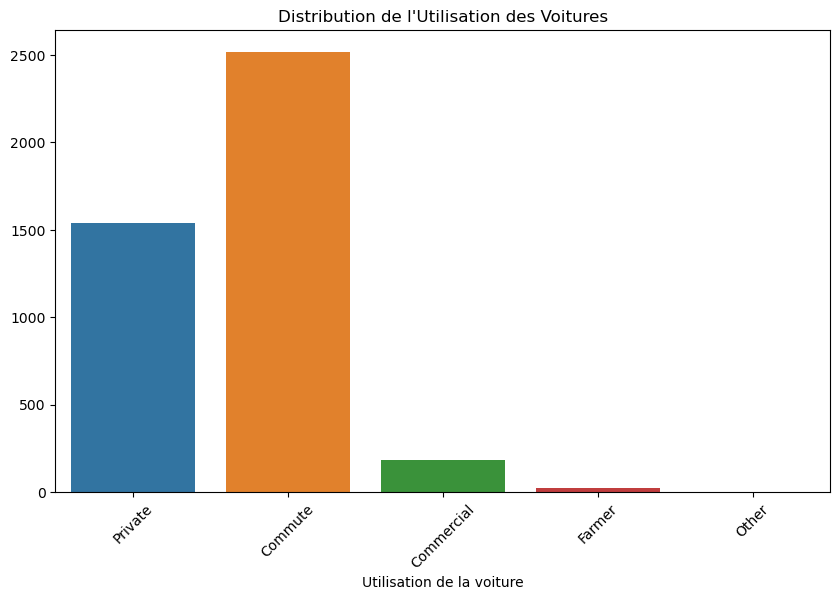

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution de la variable 'Car_use'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Car_use')
plt.title('Distribution de l\'Utilisation des Voitures')
plt.xlabel('Utilisation de la voiture')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

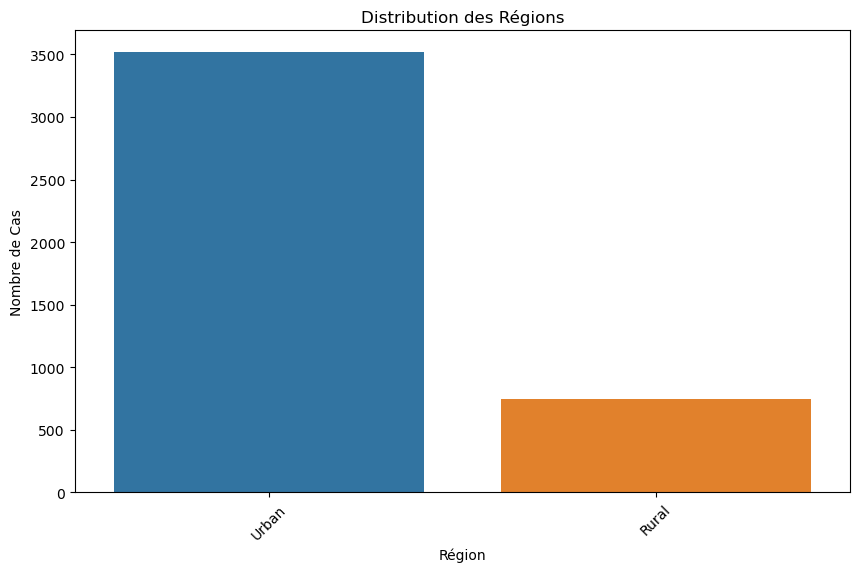

In [107]:

# Distribution de la variable 'Region'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Region')
plt.title('Distribution des Régions')
plt.xlabel('Région')
plt.ylabel('Nombre de Cas')
plt.xticks(rotation=45)
plt.show()


In [108]:
import scipy.stats as stats

# Tableau de contingence pour 'Car_use' et fréquence des sinistres
contingency_car_use = pd.crosstab(data['Car_use'], data['NB_Claim'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_car_use)
print('Chi-squared Test for Car_use and NB_Claim:')
print('Chi-squared:', chi2, 'p-value:', p, 'Degrees of freedom:', dof)

# Tableau de contingence pour 'Region' et fréquence des sinistres
contingency_region = pd.crosstab(data['Region'], data['NB_Claim'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_region)
print('Chi-squared Test for Region and NB_Claim:')
print('Chi-squared:', chi2, 'p-value:', p, 'Degrees of freedom:', dof)

Chi-squared Test for Car_use and NB_Claim:
Chi-squared: 24.337330419561308 p-value: 0.0020114650689757162 Degrees of freedom: 8
Chi-squared Test for Region and NB_Claim:
Chi-squared: 3.517833842956576 p-value: 0.17223130286566415 Degrees of freedom: 2


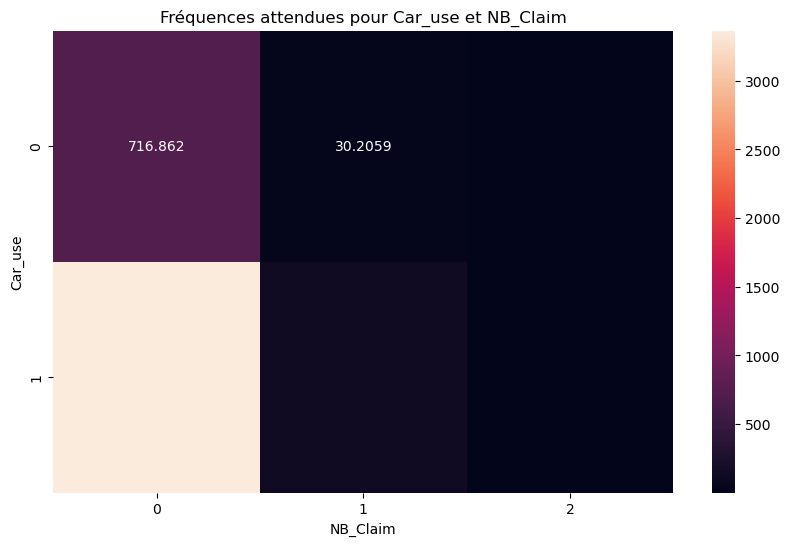

In [109]:
# Heatmap des fréquences attendues pour 'Car_use' et 'NB_Claim'
plt.figure(figsize=(10, 6))
sns.heatmap(expected, annot=True, fmt='g')
plt.title('Fréquences attendues pour Car_use et NB_Claim')
plt.xlabel('NB_Claim')
plt.ylabel('Car_use')
plt.show()



Nous avons utilisé le test du chi-carré pour détecter les associations entre différentes classifications, comme entre le statut marital et la fréquence des sinistres.

In [110]:
### variables quantitatives

**1. Construire la matrice de corrélation sur la base t de kendall**

In [111]:
# Exclure les variables catégorielles non numériques
numerical_columns = data.select_dtypes(include=['int', 'float']).columns

In [112]:
# Calculer la matrice de corrélation de Kendall
correlation_matrix = data[numerical_columns].corr(method='kendall')

In [113]:
# Afficher la matrice de corrélation
correlation_matrix.head(70)

Annual.pct.driven  Total.miles.driven  Pct.drive.mon  \
Annual.pct.driven                1.000000            0.423812      -0.008455   
Total.miles.driven               0.423812            1.000000      -0.045371   
Pct.drive.mon                   -0.008455           -0.045371       1.000000   
Pct.drive.tue                   -0.023334           -0.043612       0.142172   
Pct.drive.wed                    0.032999            0.008751       0.104478   
Pct.drive.thr                    0.000009           -0.043584       0.029349   
Pct.drive.fri                   -0.008143            0.031762      -0.063131   
Pct.drive.sat                    0.012652            0.052261      -0.297352   
Pct_drive_sun                    0.040573            0.080601      -0.247029   
Pct.drive.2hrs                   0.030863            0.197372      -0.047124   
Pct.drive.3hrs                   0.081325            0.188662      -0.020488   
Pct.drive.4hrs                   0.072950            0.124881      -0.002318   
Pct.drive.wkday                 -0.024785           -0.070787       0.323825   
Pct.drive.wkend                  0.025734            0.071725      -0.322887   
Pct.drive.rush am                0.074426            0.132625       0.013809   
Pct.drive.rush pm                0.010734            0.109793      -0.032809   
Avgdays.week                     0.055129            0.260260      -0.022161   
Accel.06miles                    0.034954           -0.060981       0.031855   
Accel.08miles                    0.027622           -0.046795       0.029034   
Accel.09miles                    0.035162           -0.041558       0.019770   
Accel.11miles                    0.012307           -0.064683       0.026379   
Accel.12miles                   -0.007856           -0.068554       0.039404   
Accel.14miles                   -0.020424           -0.055107       0.032762   
Brake.06miles                    0.034849           -0.054519       0.031869   
Brake.08miles                    0.020554           -0.054692       0.019942   
Brake.09miles                    0.021244           -0.045559       0.021686   
Brake.11miles                    0.023133           -0.037658       0.015053   
Brake.12miles                    0.000534           -0.061111       0.011152   
Brake.14miles                   -0.020723           -0.081174       0.027131   
Left.turn.intensity08            0.112811            0.072832      -0.002344   
Left.turn.intensity09            0.108513            0.081731      -0.003874   
Left.turn.intensity10            0.105952            0.094089      -0.007166   
Left.turn.intensity11            0.097283            0.098497      -0.007842   
Left.turn.intensity12            0.099412            0.103680      -0.008199   
Right.turn.intensity08           0.102608            0.072117       0.013798   
Right.turn.intensity09           0.098202            0.081491       0.012932   
Right.turn.intensity10           0.094409            0.093685       0.015169   
Right.turn.intensity11           0.095214            0.096797       0.013405   
Right.turn.intensity12           0.106044            0.106269       0.019106   
NB_Claim                         0.026859            0.051021       0.024073   
AMT_Claim                       -0.002402           -0.012832       0.007615   
Duration                         0.351223            0.255808       0.001777   
Insured_age                     -0.065407           -0.153808       0.032805   
Car_age                         -0.083218           -0.153933       0.025211   
Credit_score                     0.024701           -0.101484      -0.000244   
Annual_miles_drive              -0.013200            0.180255      -0.035652   
Years_noclaims                  -0.060829           -0.100318       0.021747   
Territory                       -0.005203            0.017265       0.003496   

                        Pct.drive.tue  Pct.drive.wed  Pct.drive.thr  \
Annual.pct.driven           -0.0

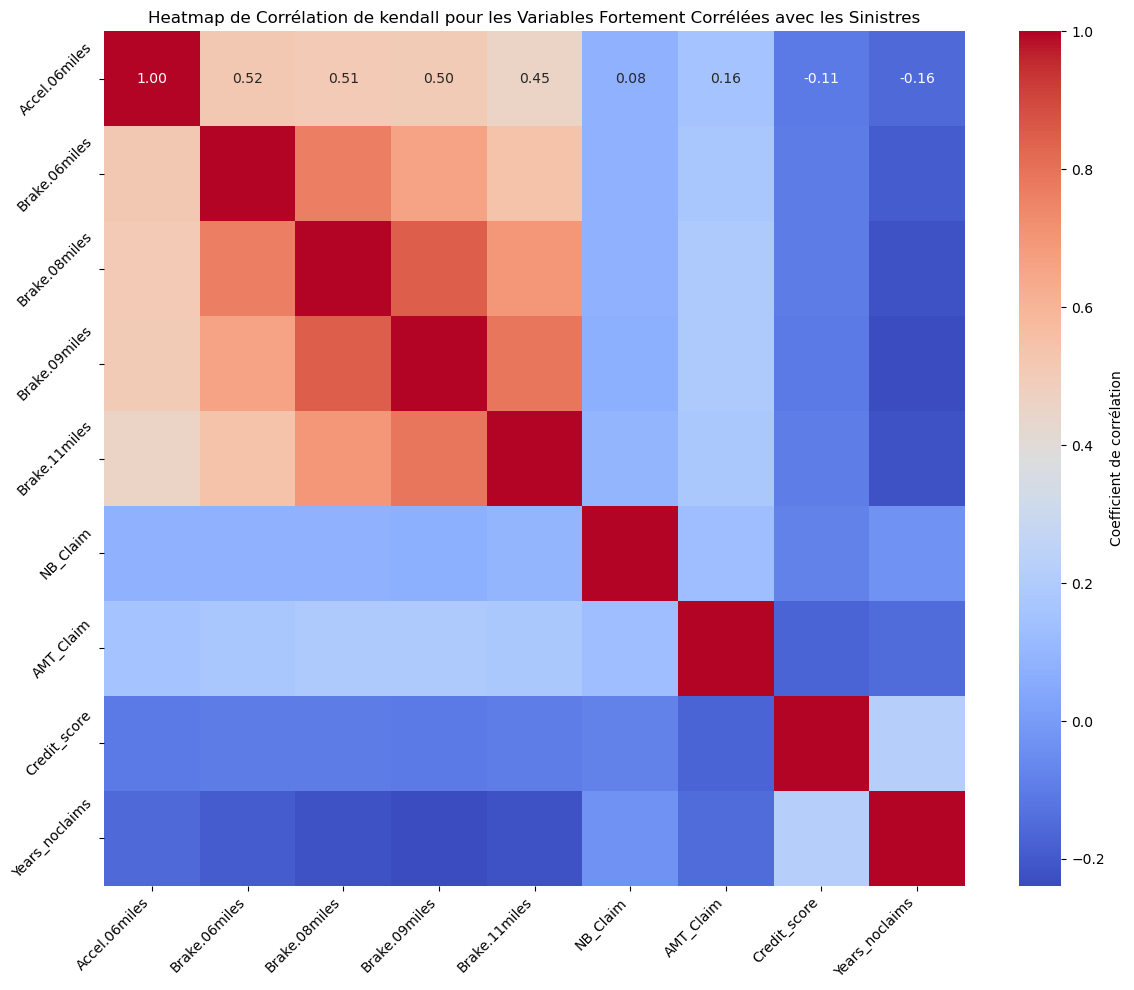

In [114]:
# Afficher une matrice de corrélation en utilisant la corrélation de kendall
corr_matrix = data[numerical_columns].corr(method='kendall')

# Ajustement du seuil de corrélation
correlation_threshold = 0.14 # Exemple avec un seuil plus bas

# Trouvons les variables fortement corrélées avec 'NB_Claim' ou 'AMT_Claim'
strong_corrs_with_nb_claim = corr_matrix['NB_Claim'].abs() > correlation_threshold
strong_corrs_with_amt_claim = corr_matrix['AMT_Claim'].abs() > correlation_threshold

# Fusionner les deux séries de corrélations et ajouter 'NB_Claim' et 'AMT_Claim'
strong_corrs = strong_corrs_with_nb_claim | strong_corrs_with_amt_claim
strong_corrs['NB_Claim'] = True
strong_corrs['AMT_Claim'] = True

# Utiliser l'index des corrélations fortes pour filtrer les colonnes du DataFrame
strong_corrs_columns = strong_corrs[strong_corrs].index
corr_matrix_strong = data[strong_corrs_columns].corr(method='kendall')

# Afficher la heatmap pour les variables sélectionnées
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_strong, annot=True, fmt=".2f", cmap='coolwarm', 
            xticklabels=corr_matrix_strong.columns, yticklabels=corr_matrix_strong.columns,
            cbar_kws={'label': 'Coefficient de corrélation'})
plt.title('Heatmap de Corrélation de kendall pour les Variables Fortement Corrélées avec les Sinistres')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45)
plt.tight_layout()  # Assurez-vous que rien n'est coupé dans le graphique
plt.show()

In [115]:
# Calcul de la corrélation entre 'AMT_Claim' et 'NB_Claim'
correlation = data['AMT_Claim'].corr(data['NB_Claim'])

print(f"La corrélation de Pearson entre 'AMT_Claim' et 'NB_Claim' est : {correlation}")

La corrélation de Pearson entre 'AMT_Claim' et 'NB_Claim' est : 0.11444821043014644


In [116]:
# Calcul de la corrélation entre 'AMT_Claim' et 'NB_Claim'
correlation = data['AMT_Claim'].corr(data['Brake.06miles'])

print(f"La corrélation de Pearson entre 'AMT_Claim' et 'Brake.06miles' est : {correlation}")

La corrélation de Pearson entre 'AMT_Claim' et 'Brake.06miles' est : 0.14832632849631366


- Cette matrice de corrélation de **kendall** nous aidera à sélectionner les variables pertinentes pour prédire notre variable de réponse, car elle est capable de capturer les relations monotones, même non linéaires, entre les variables.
- 
Nous choisirons de nous appuyer sur cette méthode ca, contrairement à la corrélation de Pearson,ou même de Spearman,  la corrélation de **kendall** n' estpass affectée par les valeurs extrêmes et peut donc fournir une meilleure compréhension des associations sous-jacentes dans nos données.

**Objectif de la Heatmap:**

L'objectif de cette heatmap est de visualiser la force des associations entre notre variable de reponse et les variables explicatives . Cela permet d'identifier les relations potentiellement significatives qui pourraient mériter une enquête plus approfondie ou être incluses dans un modèle prédictif pour les sinistres.

**2. calculera et affichera les scores F**

Cette deuxieme mothode nous calculera et affichera les scores F pour les caractéristiques numériques et les dummies, et sélectionnera les 10 meilleures pour être utilisées dans notre modèle. L'idée c'est d'explorer quelques pistes supplementaire et selectionner la meilleure approche

**a. Mettre les variables qualitatives sous la forme d’indicatrice et ajouter une constante**

In [117]:
# Exclure les variables catégorielles non numériques
numerical_columns = data.select_dtypes(include=['int', 'float']).columns

# Encodage one-hot des variables catégorielles
categorical_vars = [
    'Insured_sex', 'Marital', 'Car_use', 'Region']
data = pd.get_dummies(data, columns=categorical_vars, drop_first=True)

In [118]:
# Convertir les booléens en 0 et 1 pour les variables catégorielles
for col in data.columns:
    if data[col].dtype == 'bool':
        data[col] = data[col].astype(int)

**b. Encodage et Sélection des Variables avec SelectKBest et le Test F de la Régression pour predire le montant des sinistres**

In [119]:
# Assurez-vous d'inclure vos variables numériques et les colonnes d'encodage one-hot
numerical_plus_dummies = data.select_dtypes(include=[np.number])

# Sélection des k meilleures variables basées sur le test F
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(numerical_plus_dummies.drop('AMT_Claim', axis=1), data['AMT_Claim'])
selected_features = pd.DataFrame(selector.scores_, index=numerical_plus_dummies.drop('AMT_Claim', axis=1).columns, columns=['Score'])
print(selected_features.sort_values(by='Score', ascending=False))

                             Score
Brake.11miles           176.647024
Brake.09miles           171.893656
Credit_score            166.384825
Brake.08miles           145.433003
Brake.12miles           127.705931
Brake.06miles            95.898824
Years_noclaims           93.403192
Brake.14miles            85.792333
Accel.06miles            75.761870
Accel.14miles            72.657645
Insured_age              71.825610
Accel.12miles            64.855160
Accel.08miles            63.749758
Accel.09miles            58.270828
Accel.11miles            58.262772
NB_Claim                 56.579550
Annual.pct.driven        46.906964
Car_use_Commute          39.577183
Duration                 39.431225
Car_use_Private          32.538959
Total.miles.driven       23.575411
Car_age                  16.041224
Marital_Single           12.758030
Pct_drive_sun             7.319916
Pct.drive.2hrs            6.419083
Region_Urban              6.186027
Pct.drive.fri             5.821881
Right.turn.intensity

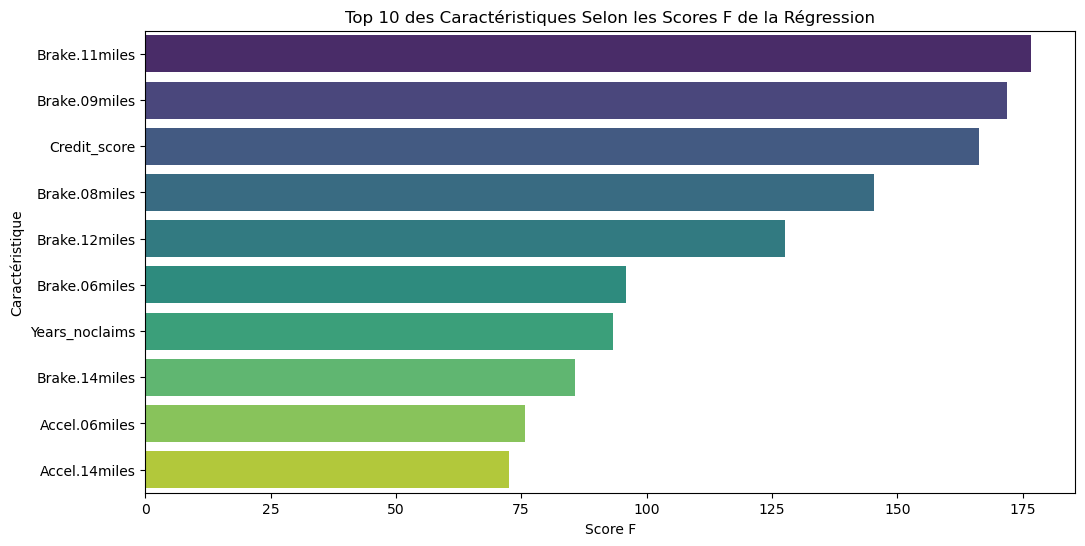

In [120]:
#  'AMT_Claim' est notre la variable cible
numerical_plus_dummies = data.select_dtypes(include=[np.number])

# Sélection des 10 meilleures variables basées sur le test F
selector = SelectKBest(score_func=f_regression, k=15)
X_new = selector.fit_transform(numerical_plus_dummies.drop('AMT_Claim', axis=1), data['AMT_Claim'])

# Obtenir les scores pour chaque variable
scores = selector.scores_
columns = numerical_plus_dummies.drop('AMT_Claim', axis=1).columns

# Créer un DataFrame pour stocker les scores et les noms des variables
feature_scores = pd.DataFrame({'Feature': columns, 'Score': scores})

# Trier le DataFrame selon les scores dans l'ordre décroissant
feature_scores_sorted = feature_scores.sort_values(by='Score', ascending=False).head(10)

# Afficher le graphique à barres des scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores_sorted, palette='viridis')

# Ajouter des titres et des étiquettes
plt.title('Top 10 des Caractéristiques Selon les Scores F de la Régression')
plt.xlabel('Score F')
plt.ylabel('Caractéristique')

# Afficher le graphique
plt.show()

## Modélisation économétrique

#### 1. Visualisation de la variable cible

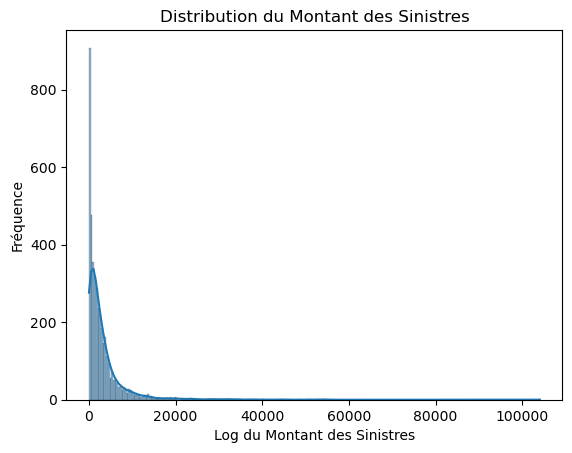

In [121]:
# Visualisation de la variable cible
sns.histplot(data['AMT_Claim'], kde=True)
plt.title('Distribution du Montant des Sinistres')
plt.xlabel('Log du Montant des Sinistres')
plt.ylabel('Fréquence')
plt.show()

- Nous observons une distribution asymétrique des montants des sinistres. Cette constatation est cruciale pour la modélisation précise et nous permettra d'ajuster au mieux notre modèle prédictif.
  
 **Pourquoi la distribution n'est pas normale ?**
- La plupart des polices d'assurance n'entraînent pas de sinistre, donc il y a une concentration de valeurs à zéro ou près de zéro.
  
- Les sinistres importants sont moins fréquents mais peuvent varier considérablement en taille, ce qui crée la longue queue à droite.

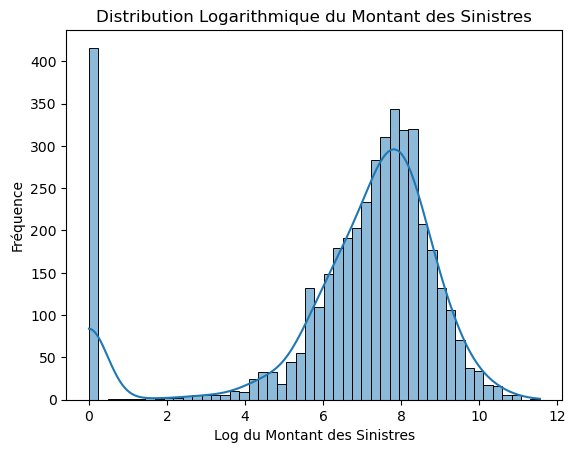

In [122]:
# Transformation logarithmique de la variable cible
data['Log_AMT_Claim'] = np.log(data['AMT_Claim'] + 1)

# Visualisation de la distribution transformée
sns.histplot(data['Log_AMT_Claim'], kde=True)
plt.title('Distribution Logarithmique du Montant des Sinistres')
plt.xlabel('Log du Montant des Sinistres')
plt.ylabel('Fréquence')
plt.show()

- La distribution semble toujours anormal, ce qui suggère que la transformation logarithmique n'a pas complètement normalisé les données. Cependant, la transformation a aidé à réduire l'effet de la queue à droite, ce qui est une amélioration par rapport à la distribution originale.


- Comme la distribution des données après la transformation logarithmique montre que les données sont toujours anormal et positives, un GLM avec une distribution de **gamma** et un lien log nous semble approprié car la distribution gamma est flexible pour modéliser les distributions asymétriques positives.

#### 2. Construction et Validation du Modèle GLM

In [123]:
# Transformation logarithmique de la variable cible pour réduire l'asymétrie
data['Log_AMT_Claim'] = np.log(data['AMT_Claim'] + 1)

In [124]:
# Sélection des variables explicatives, y compris les colonnes d'encodage one-hot
selected_columns = [col for col in data.columns if col not in ['AMT_Claim', 'Log_AMT_Claim']]

In [125]:
X = data[selected_columns]
y = data['Log_AMT_Claim']

# Ajout d'une constante pour l'intercept du modèle
X = sm.add_constant(X)

In [126]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## MODELE 1

In [127]:
# Ajustement d'un modèle GLM avec une distribution Poisson et un lien log
model1 = sm.GLM(y_train, X_train, family=sm.families.Gamma(link=sm.families.links.Log())).fit()
print(model1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          Log_AMT_Claim   No. Observations:                 3412
Model:                            GLM   Df Residuals:                     3358
Model Family:                   Gamma   Df Model:                           53
Link Function:                    Log   Scale:                         0.14843
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Thu, 02 May 2024   Deviance:                       23562.
Time:                        16:55:08   Pearson chi2:                     498.
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

* Évaluation du modèle 1

In [128]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prédiction
predictions = model1.predict(X_test)

# Calcul du MSE, RMSE, MAE, et R²
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Affichage des résultats
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)


MSE: 5.675239957880598
RMSE: 2.382276213599212
MAE: 1.6650450212608559
R²: 0.1021261635109143


## MODELE 2

**a. Retirer les variables non significatives ou non pertinentes pour l’étude afin de construire la matrice des exogènes**

In [129]:
# Identifier les variables non significatives
non_significant_vars = model1.pvalues[model1.pvalues > 0.05].index.tolist()

# on s'assure que 'const' est exclu de la liste des variables non significatives (s'il y est)
if 'const' in non_significant_vars:
    non_significant_vars.remove('const')

# on crée une nouvelle liste de colonnes en excluant les variables non significatives
selected_columns = [col for col in selected_columns if col not in non_significant_vars]

In [130]:
# On prépare les nouvelles variables explicatives sans les variables non significatives
X = data[selected_columns]
y = data['Log_AMT_Claim']

# Ajout d'une constante pour l'intercept du modèle
X = sm.add_constant(X)

In [131]:
# on Divise les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# On ajuster le nouveau modèle sans les variables non significatives
model2 = sm.GLM(y_train, X_train, family=sm.families.Gamma(link=sm.families.links.Log())).fit()
print(model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          Log_AMT_Claim   No. Observations:                 3412
Model:                            GLM   Df Residuals:                     3401
Model Family:                   Gamma   Df Model:                           10
Link Function:                    Log   Scale:                         0.14511
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Thu, 02 May 2024   Deviance:                       23559.
Time:                        16:55:08   Pearson chi2:                     494.
No. Iterations:                    60   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.7912      0.095     

### b. Diagnostic du Modèle 2

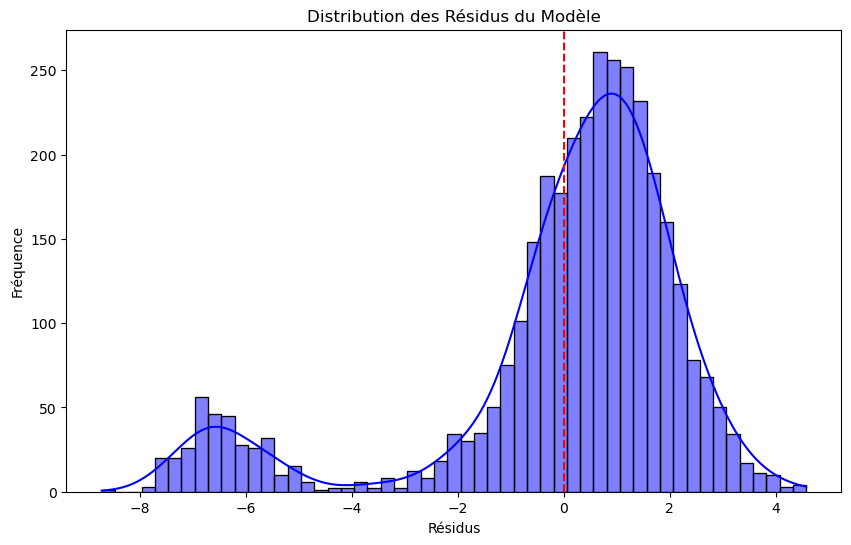

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prédire sur l'ensemble d'entraînement pour calculer les résidus
predictions_train = model2.predict(X_train)

# Calculer les résidus
residus = y_train - predictions_train

# Visualisation des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus, kde=True, color='blue')
plt.title('Distribution des Résidus du Modèle')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.axvline(x=0, color='red', linestyle='--')  # Ligne verticale à l'origine des résidus
plt.show()


Les residus sont centrés autour de 0, ce qui est attendu 

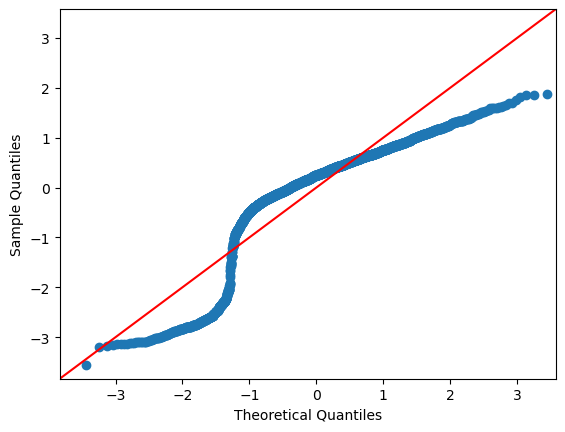

In [133]:
sm.qqplot(model2.resid_response, fit=True, line='45')
plt.show()

Ho:Normalité des residues, Pvalue >0,05; On rejete H0 et on que conclut que la distribution des residus ne sont pas normale. 

* Évaluation du modèle 2

In [134]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prédiction
predictions = model2.predict(X_test)

# Calcul du MSE, RMSE, MAE, et R²
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Affichage des résultats
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)


MSE: 5.799675016236703
RMSE: 2.408251443731884
MAE: 1.662539442842353
R²: 0.08243942179265518


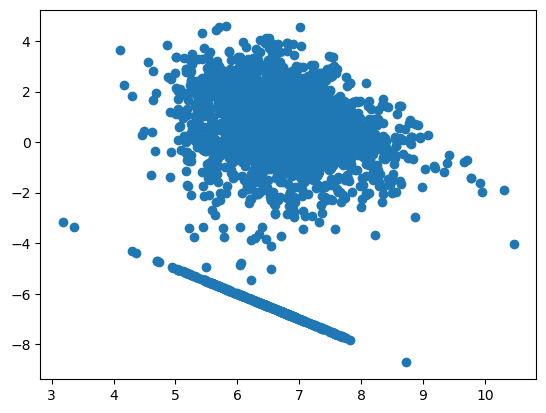

In [135]:
plt.scatter(model2.fittedvalues, model2.resid_response)

### MODELE 3

- Bien que le modèle 2 utilise le logarithme du montant des sinistres (`Log_AMT_Claim`) comme variable cible pour une meilleure normalisation et pour réduire l'impact des valeurs extrêmes, l'objectif final reste de prédire le montant réel des sinistres. Les prédictions logarithmiques seront retransformées en montant des sinistres en utilisant la fonction exponentielle pour interpréter les résultats dans une échelle significative.

In [136]:
X = data[selected_columns]
y = np.log(data['AMT_Claim'] + 1)  # On ajoute 1 pour éviter de prendre le log de zéro

# Ajouter une constante pour l'intercept
X = sm.add_constant(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajuster le modèle GLM avec une famille poisson  et une fonction de lien log
model3 = sm.GLM(y_train, X_train, family=sm.families.Gamma(link=sm.families.links.Log())).fit()

# Afficher le résumé du modèle
print(model3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              AMT_Claim   No. Observations:                 3412
Model:                            GLM   Df Residuals:                     3401
Model Family:                   Gamma   Df Model:                           10
Link Function:                    Log   Scale:                         0.14511
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Thu, 02 May 2024   Deviance:                       23559.
Time:                        16:55:09   Pearson chi2:                     494.
No. Iterations:                    60   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.7912      0.095     

 **a. Diagnostic du modèle 3**

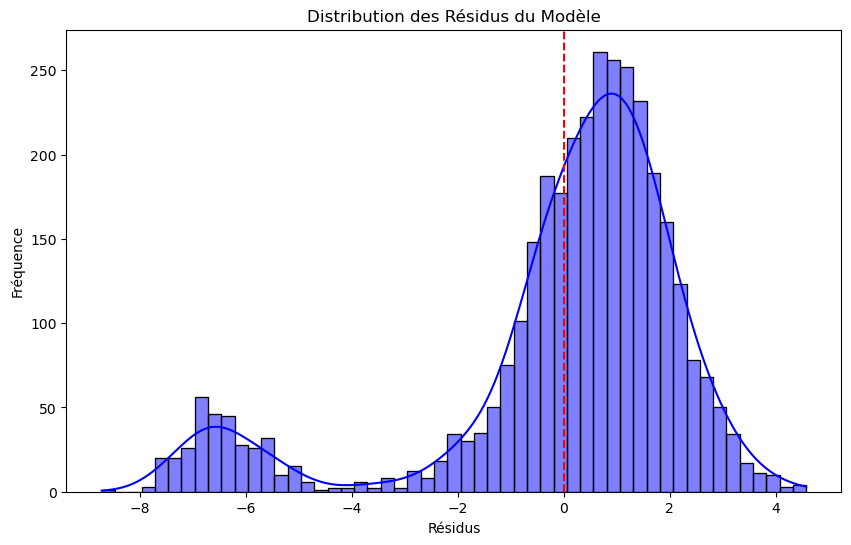

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prédire sur l'ensemble d'entraînement pour calculer les résidus
predictions_train = model3.predict(X_train)

# Calculer les résidus
residus = y_train - predictions_train

# Visualisation des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus, kde=True, color='blue')
plt.title('Distribution des Résidus du Modèle')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.axvline(x=0, color='red', linestyle='--')  # Ligne verticale à l'origine des résidus
plt.show()

In [138]:
resid3= model3.resid_response

In [139]:
from scipy.stats import shapiro
shapiro_test = shapiro(resid3)
print('Shapiro-Wilk Test pour Modèle 2:', shapiro_test)

Shapiro-Wilk Test pour Modèle 2: ShapiroResult(statistic=0.810908854007721, pvalue=0.0)


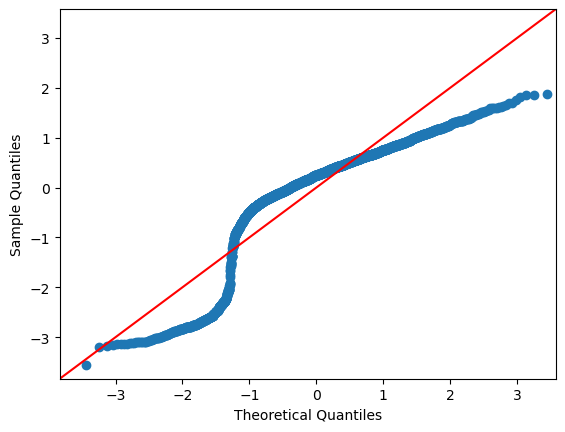

In [140]:
sm.qqplot(model3.resid_response, fit=True, line='45')
plt.show()

**b. Évaluation du modèle 3** 

In [141]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prédiction
predictions = model3.predict(X_test)

# Calcul du MSE, RMSE, MAE, et R²
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Affichage des résultats
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)


MSE: 5.799675016236703
RMSE: 2.408251443731884
MAE: 1.662539442842353
R²: 0.08243942179265518


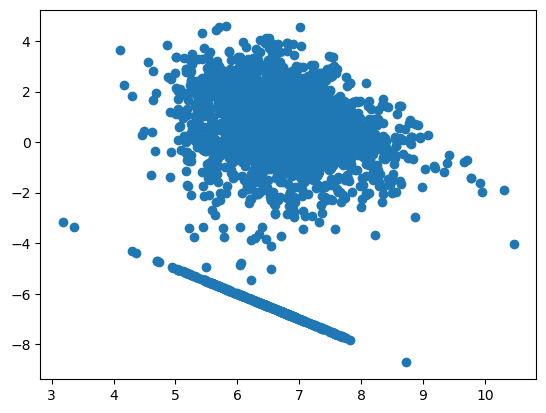

In [142]:
plt.scatter(model3.fittedvalues, model3.resid_response)

### l'importance des variables  dans notre GLM

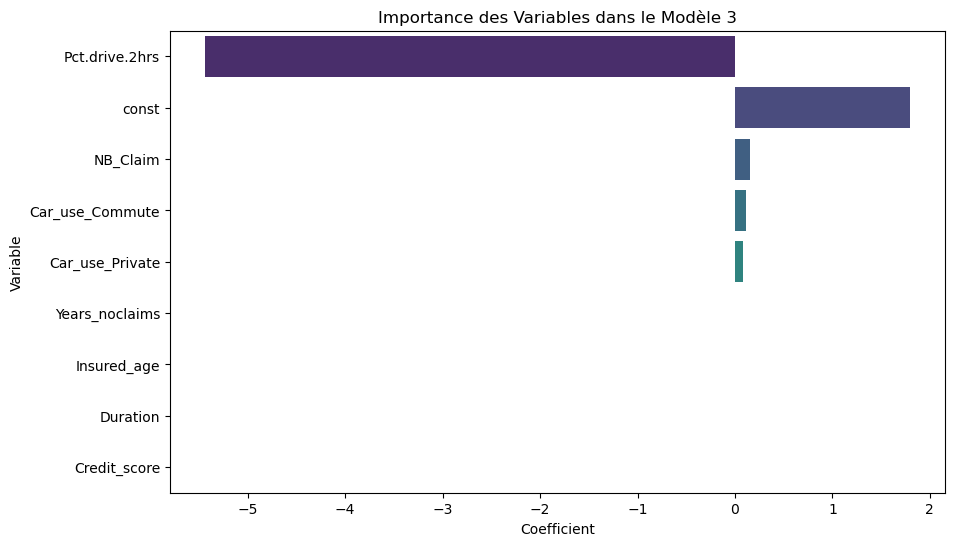

In [143]:
# Créer un DataFrame pour les coefficients et les p-valeurs
coefficients = model3.params
p_values = model3.pvalues

df_coeffs = pd.DataFrame({'Variable': coefficients.index, 'Coefficient': coefficients.values, 'P_value': p_values.values})
df_coeffs_filtered = df_coeffs[df_coeffs['P_value'] < 0.05]  # Filtrer pour les variables significatives

# Trier par l'importance absolue des coefficients
df_coeffs_filtered = df_coeffs_filtered.reindex(df_coeffs_filtered['Coefficient'].abs().sort_values(ascending=False).index)

# Créer un graphique à barres pour l'importance des variables
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Variable', data=df_coeffs_filtered, palette='viridis')
plt.title('Importance des Variables dans le Modèle 3')
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.show()

## Objectif du Modèle
L'objectif de ce modèle est de prédire le montant des sinistres (`AMT_Claim`) en utilisant divers prédicteurs. Ces prédicteurs comprennent des mesures de comportement de conduite, des caractéristiques démographiques et des informations relatives aux polices d'assurance.